# Employee Performance Analysis



- Candidate Name      : SHREEHARI.K
- Project Code        : : 10281
- Module              : Certified Data Scientist - Project
- Exam Format         : Open Project- IABAC™ Project Submission
- Project Assessment  : IABAC™ 
- Submission Deadline Date:   03-Jan-2024



# PROBLEM STATEMENT

- 1. Department wise performances
- 2. Top 3 Important Factors effecting employee performance
- 3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
- 4. Recommendations to improve the employee performance based on insights from analysis

# Importing Basic Libraries

In [4]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [5]:
# Loading dataset
emp = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
emp1 = emp.iloc[:,1:]
emp1.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


In [6]:
emp1.tail(5)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,...,2,6,3,3,6,5,0,4,No,4
1196,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,...,1,4,2,3,1,0,0,0,No,3
1197,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,...,3,20,3,3,20,8,3,8,No,3
1198,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,...,2,9,3,4,8,7,7,7,No,3
1199,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,...,1,4,3,3,2,2,2,0,Yes,2


# Basic Checks

In [7]:
emp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

In [8]:
emp1.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [9]:
#Checking the shape of the Data set
print('No. of rows :',emp1.shape[0])
print('No. of columns',emp1.shape[1])

No. of rows : 1200
No. of columns 27


In [10]:
print('UNIQUE VALUES: \n')
for i in emp1.columns:
    print(i,':', emp[i].unique())

UNIQUE VALUES: 

Age : [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Gender : ['Male' 'Female']
EducationBackground : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus : ['Single' 'Married' 'Divorced']
EmpDepartment : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DistanceFromHome : [10 14  5 16  8  1 24  3 27 19  9  2  7  6 26 11 23 13 29 12  4 25 21 18

### INFERANCE:

- So as per our finding there is no need to clean data as there is no null or absurd value and no space betwen column names. Though the 'EmpNumber' column is useless for analyzing the data, so we can drop this column, so now the data consists of 27 columns and 1200 rows.

In [11]:
#Check for empty elements
nvc = pd.DataFrame(emp1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/emp1.shape[0],3)*100
print(nvc)

                              Total Null Values  Percentage
Age                                           0         0.0
YearsWithCurrManager                          0         0.0
YearsSinceLastPromotion                       0         0.0
ExperienceYearsInCurrentRole                  0         0.0
ExperienceYearsAtThisCompany                  0         0.0
EmpWorkLifeBalance                            0         0.0
TrainingTimesLastYear                         0         0.0
TotalWorkExperienceInYears                    0         0.0
EmpRelationshipSatisfaction                   0         0.0
EmpLastSalaryHikePercent                      0         0.0
OverTime                                      0         0.0
NumCompaniesWorked                            0         0.0
Attrition                                     0         0.0
EmpJobSatisfaction                            0         0.0
EmpJobInvolvement                             0         0.0
EmpHourlyRate                           

In [12]:
emp1.duplicated().sum()

0

# Rename The Column Name

In [13]:
emp1.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [14]:
emp1.columns= ['Age', 'Gender', 'Education Background', 'Marital Status',
       'Employees Department', 'Employees Job Role', 'Business Travel Frequency',
       'Distance From Home', 'Employee Education Level', 'Employee Environment Satisfaction',
       'Employee Hourly Rate', 'Employee Job Involvement', 'Employee Job Level',
       'Employee Job Satisfaction', 'Number of Companies Worked', 'Over Time',
       'Employee Last Salary Hike Percent', 'Employee Relationship Satisfaction',
       'Total Work Experience In Years', 'Training Times Last Year',
       'Employee Work Life Balance', 'Experience Years At This Company',
       'Experience Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager', 'Attrition', 'Performance Rating']

# DOMAIN ANALITICS

- 1.EmpNumber :- This is Employee ID Number
- 2.Age :- Age Of The Employee
- 3.Gender :- Gender of The Employee
- 4.EducationBackground :- Education Backround of The Employee
- 5.MaritalStatus :- Maritial Status of The Employee
- 6.EmpDepartment :- Employee Knowladge of The department
- 7.EmpJobRole :- Employee Working Jobrole of The Company
- 8.BusinessTravelFrequency :- Do You Like The Business Travel of The Employee
- 9.DistanceFromHome :- How Long Distance From Home to Office
- 10.EmpEducationLevel :- Education Level of Employee
- 11.EmpEnvironmentSatisfaction :- Employee Environment Satisfication
- 12.EmpHourlyRate :- Employee Hourly Working Rata Of The Company
- 13.EmpJobInvolvement :- Employee Job Involvement
- 14.EmpJobLevel :- Employee Job Level Of The Company
- 15.EmpJobSatisfaction :- Employe Job Satisfacation Or Not Satisfacation
- 16.NumCompaniesWorked :- Totel Number Company Worked at Employee
- 17.OverTime :- Employee Doing Overtime Or Not
- 18.EmpLastSalaryHikePercent :- Employee Last Salary Hike Percentage
- 19.EmpRelationshipSatisfaction :- Employee Last Relationship Satisfacation
- 20.TotalWorkExperienceInYears :- Totel Working Experience of The Employee
- 21.TrainingTimesLastYear :- Totel Training Time Of The Last Year
- 22.EmpWorkLifeBalance :- Employee Work Life Balance
- 23.ExperienceYearsAtThisCompany :- Employee Experience in The Current Working Company
- 24.ExperienceYearsInCurrentRole :- Experience in Current Job Role Of The Employee
- 25.YearsSinceLastPromotion :- Employee Last Promotion in Years
- 26.YearsWithCurrManager :- Years With Current Manager
- 27.Attrition :- Attrition of The Employee
- 28.PerformanceRating :- Employee Working Performance in Rating


# Statistical information about the data

In [15]:
# Getting insights of numerical values
emp1.describe()

,Age,Distance From Home,Employee Education Level,Employee Environment Satisfaction,Employee Hourly Rate,Employee Job Involvement,Employee Job Level,Employee Job Satisfaction,Number of Companies Worked,Employee Last Salary Hike Percent,Employee Relationship Satisfaction,Total Work Experience In Years,Training Times Last Year,Employee Work Life Balance,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Performance Rating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


# Numerical Features

In [16]:
num_data = emp1[['Age','Distance From Home','Employee Hourly Rate','Number of Companies Worked','Employee Last Salary Hike Percent', 'Total Work Experience In Years',
              'Training Times Last Year','Experience Years At This Company','Experience Years In Current Role','Years Since Last Promotion',
              'Years With Curr Manager']]
num_data

,Age,Distance From Home,Employee Hourly Rate,Number of Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,32,10,55,1,12,10,2,10,7,0,8
1,47,14,42,2,12,20,2,7,7,1,7
2,40,5,48,5,21,20,2,18,13,1,12
3,41,10,73,3,15,23,2,21,6,12,6
4,60,16,84,8,14,10,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,71,1,20,6,3,6,5,0,4
1196,37,10,80,3,17,4,2,1,0,0,0
1197,50,28,74,1,11,20,3,20,8,3,8
1198,34,9,46,1,14,9,3,8,7,7,7


# Checking For Normal Distribution

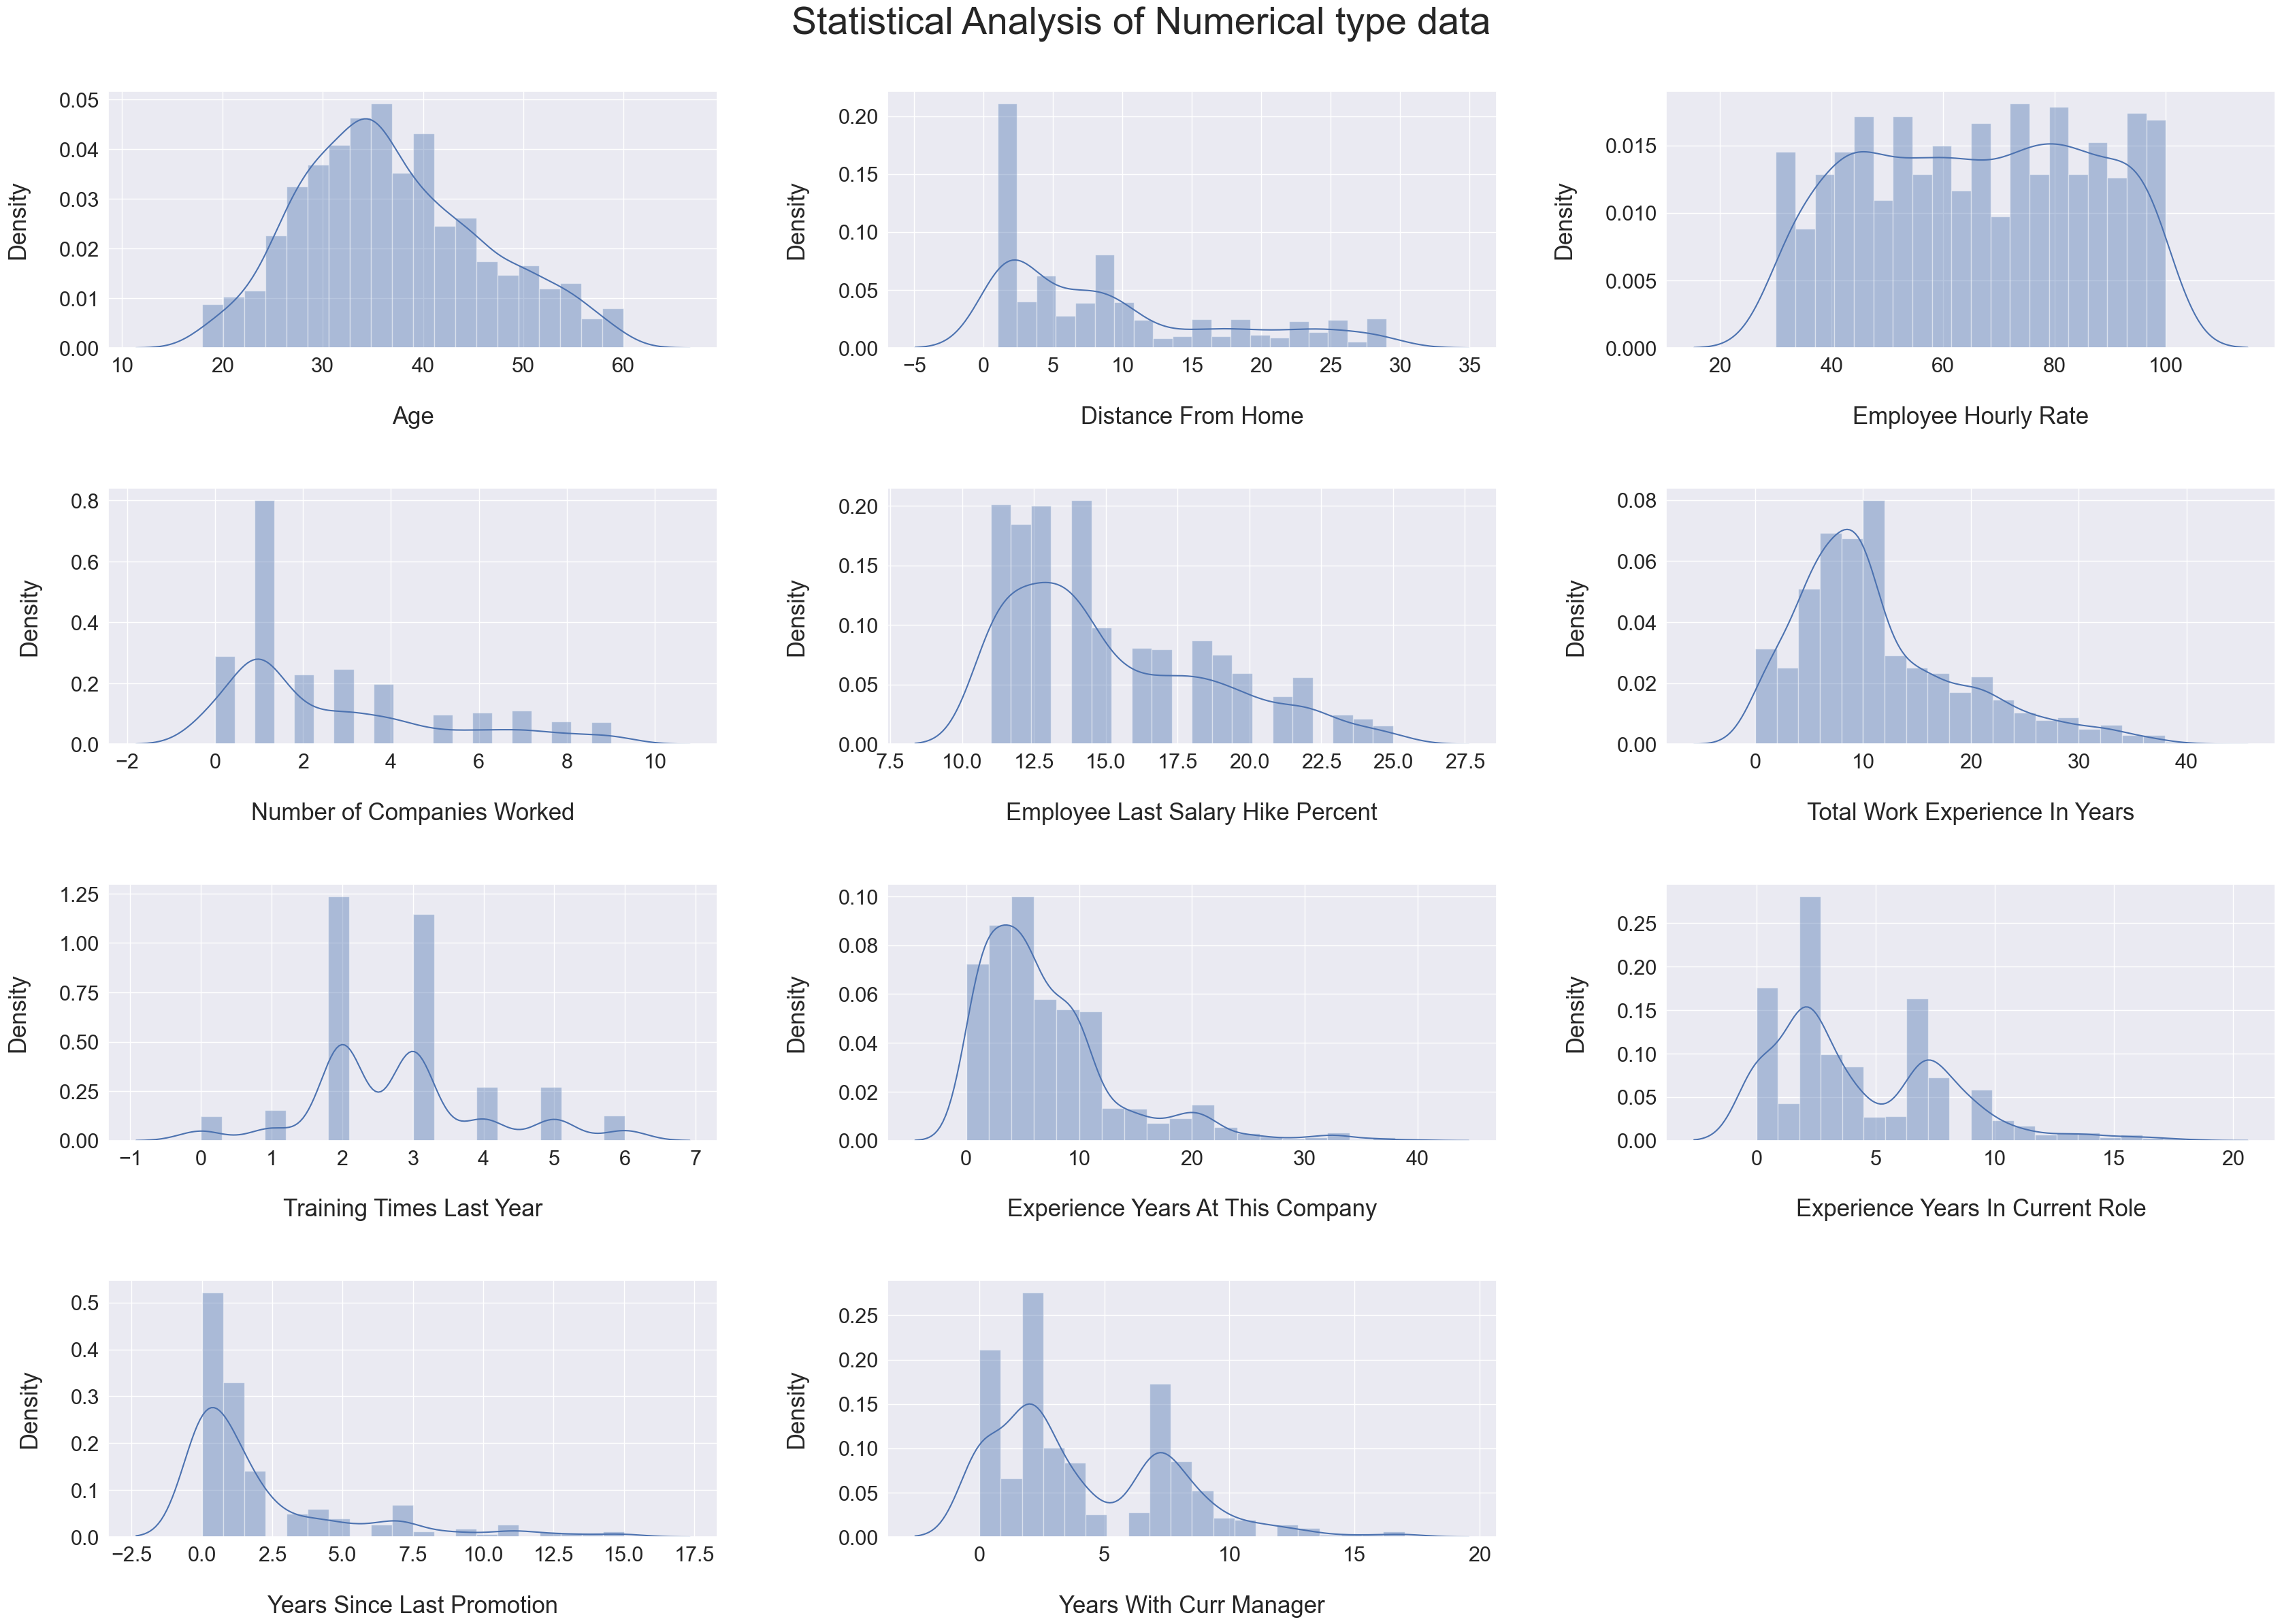

In [17]:
sns.set(rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":22,"xtick.labelsize":22,"ytick.labelsize":22,
            "legend.fontsize":12})

fig = plt.figure(figsize=(35,25))
fig.suptitle("Statistical Analysis of Numerical type data", fontsize=40)
for index,col in enumerate(num_data):
    plt.subplot(4,3,index+1)
    sns.distplot(num_data.loc[:,col].dropna(),kde=True,bins=20)
    plt.xlabel(f"\n{col}",fontsize=25)
    plt.ylabel("Density\n",fontsize=25)
fig.tight_layout(pad=4.0)
fig.subplots_adjust(top=0.93)

##### INSIGHTS

- Here we show the statistical Analysis of Numeric type data

In [18]:
# Defining a function for checking  skewness
from scipy.stats import skew, kurtosis
def skewedness(data):
    skewed=[]
    for col in data:
        sk=data[col].skew()
        if(sk>=1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed
print(f"\033[1mSkewed Column name : {skewedness(num_data)}")
print('\033[1mRange of skewness & kurtosis, S < |1.96|')

Skewed Column name : ['Years Since Last Promotion']
Range of skewness & kurtosis, S < |1.96|


In [19]:
# Checking how much Skewness & Kurtosis
print('\033[1mSkewness for YearsSinceLastPromotion:',skew(emp1['Years Since Last Promotion']))
print('\033[1mKurtosis for YearsSinceLastPromotion:',kurtosis(emp1['Years Since Last Promotion']))

Skewness for YearsSinceLastPromotion: 1.9724620367914252
Kurtosis for YearsSinceLastPromotion: 3.5193552691799805


##### INSIGHTS

- Years since last promations is skewed with skewness 1.9724620367914252

# Square root transformation method for reducing skewness

In [20]:
# applying square root to the skewed column
num_data['Years Since Last Promotion'] = np.sqrt(num_data['Years Since Last Promotion'])

### Check for skewness of the data

In [21]:
num_data['Years Since Last Promotion'].skew()

0.7350121906940618

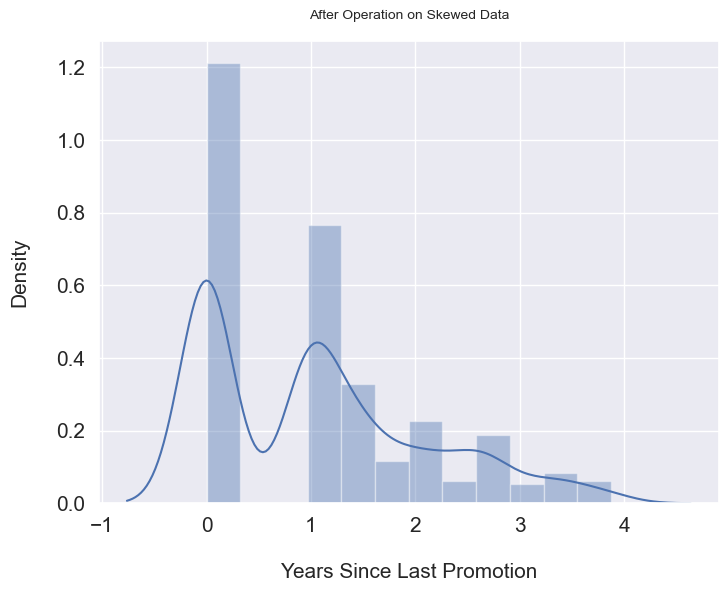

In [22]:
# Set figure size for the notebook
sns.set(rc={"font.size":15,"axes.titlesize":17,"axes.labelsize":15,"xtick.labelsize":15,"ytick.labelsize":15,
            "legend.fontsize":10})
plt.figure(figsize=(8,6))
sns.distplot(num_data['Years Since Last Promotion'])
plt.xlabel("\nYears Since Last Promotion")
plt.ylabel("Density\n")
plt.title("After Operation on Skewed Data\n",fontsize=10)
plt.show()

# Ordinal Features

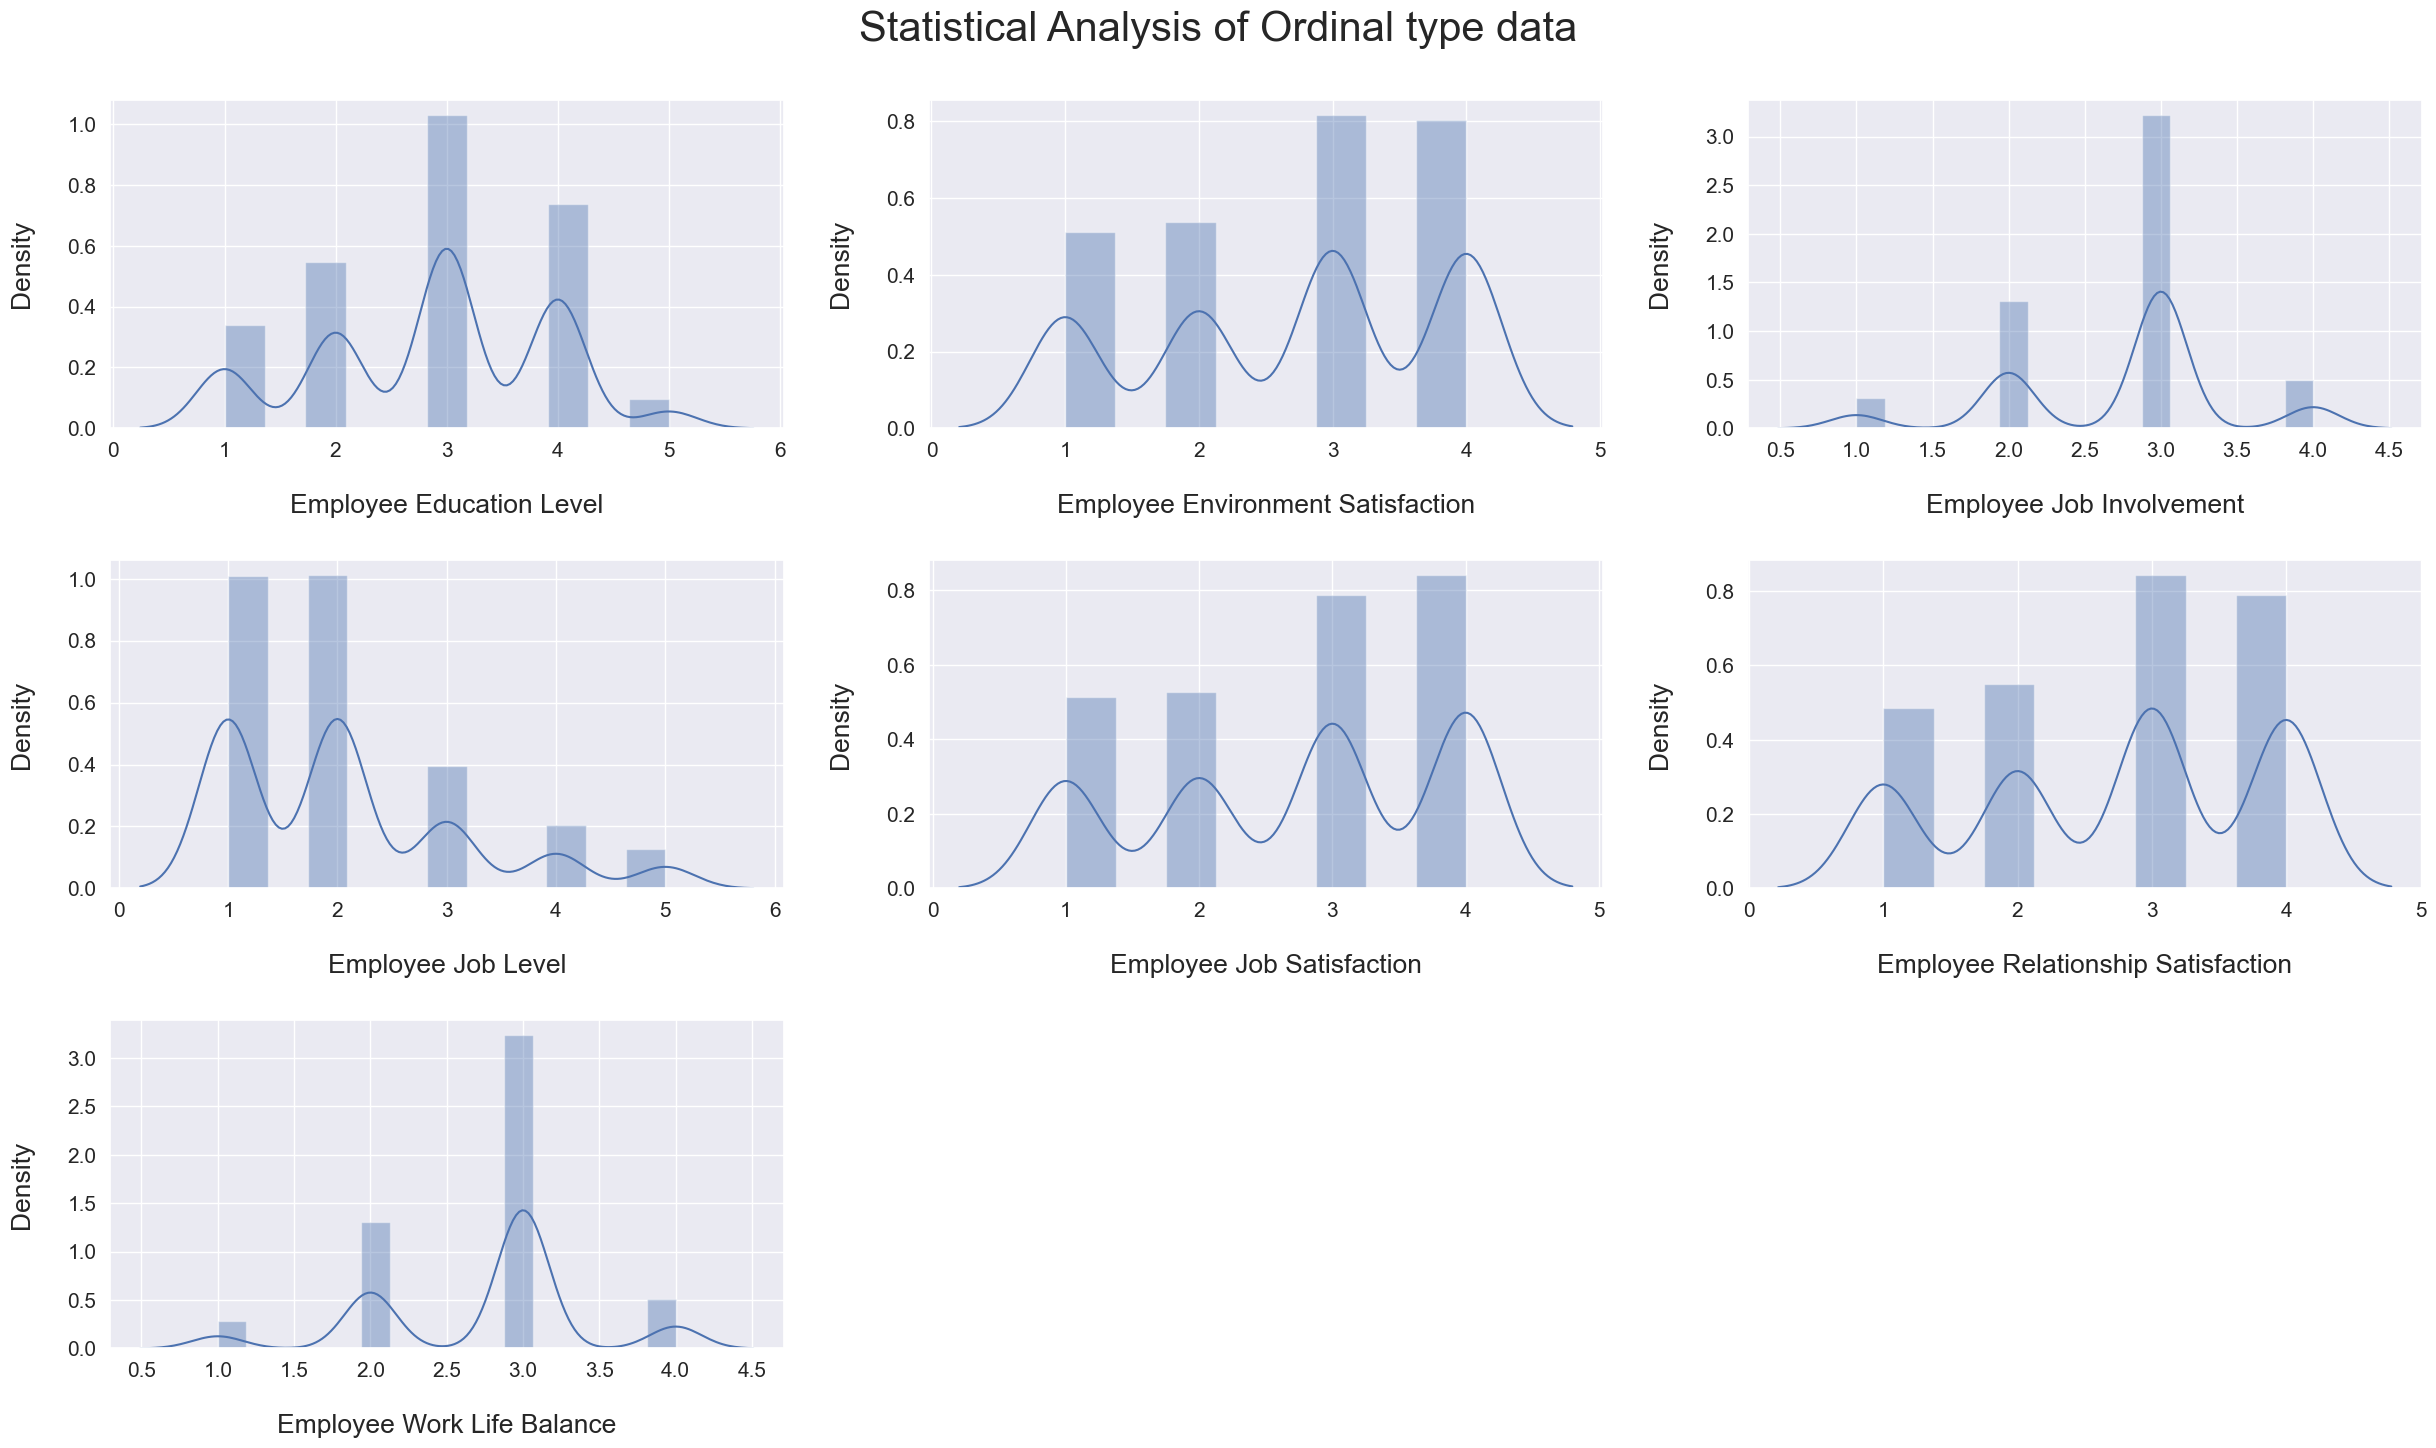

In [23]:
# Defining ordinal features

ord_data = emp1[['Employee Education Level','Employee Environment Satisfaction','Employee Job Involvement',
               'Employee Job Level','Employee Job Satisfaction','Employee Relationship Satisfaction',
               'Employee Work Life Balance']]

# figure size for the notebook
fig = plt.figure(figsize=(25,15))
fig.suptitle("Statistical Analysis of Ordinal type data", fontsize=30)
# Creating loop for ploting ordinal features
for index,cols in enumerate(ord_data):
    plt.subplot(3,3,index+1)
    sns.distplot(ord_data.loc[:,cols])
    plt.xlabel(f'\n{cols}',fontsize=19)
    plt.ylabel(f'Density\n',fontsize=19)
plt.tight_layout(pad=2)
fig.subplots_adjust(top=0.92)

# Categorical Features

In [24]:
# storing object type data in obj_data variable
obj_data = emp1.select_dtypes(include="object")
obj_data

,Gender,Education Background,Marital Status,Employees Department,Employees Job Role,Business Travel Frequency,Over Time,Attrition
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...
1195,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
1196,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
1197,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No
1198,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No


# Checking for nun/null values

In [25]:
# check for numerical data
num_data.isna().sum()

Age                                  0
Distance From Home                   0
Employee Hourly Rate                 0
Number of Companies Worked           0
Employee Last Salary Hike Percent    0
Total Work Experience In Years       0
Training Times Last Year             0
Experience Years At This Company     0
Experience Years In Current Role     0
Years Since Last Promotion           0
Years With Curr Manager              0
dtype: int64

In [26]:
# Check for ordianal data
ord_data.isna().sum()

Employee Education Level              0
Employee Environment Satisfaction     0
Employee Job Involvement              0
Employee Job Level                    0
Employee Job Satisfaction             0
Employee Relationship Satisfaction    0
Employee Work Life Balance            0
dtype: int64

In [27]:
# Check for categorical data
obj_data.isna().sum()

Gender                       0
Education Background         0
Marital Status               0
Employees Department         0
Employees Job Role           0
Business Travel Frequency    0
Over Time                    0
Attrition                    0
dtype: int64

# Creating final dataframe

In [28]:
# combining numerical, ordinal & categorial features
final_emp1 = pd.concat([num_data,ord_data,obj_data,emp1['Performance Rating']], axis=1)
final_emp1

,Age,Distance From Home,Employee Hourly Rate,Number of Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,...,Employee Work Life Balance,Gender,Education Background,Marital Status,Employees Department,Employees Job Role,Business Travel Frequency,Over Time,Attrition,Performance Rating
0,32,10,55,1,12,10,2,10,7,0.000000,...,2,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3
1,47,14,42,2,12,20,2,7,7,1.000000,...,3,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3
2,40,5,48,5,21,20,2,18,13,1.000000,...,3,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No,4
3,41,10,73,3,15,23,2,21,6,3.464102,...,2,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No,3
4,60,16,84,8,14,10,1,2,2,1.414214,...,3,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,71,1,20,6,3,6,5,0.000000,...,3,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No,4
1196,37,10,80,3,17,4,2,1,0,0.000000,...,3,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No,3
1197,50,28,74,1,11,20,3,20,8,1.732051,...,3,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No,3
1198,34,9,46,1,14,9,3,8,7,2.645751,...,4,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No,3


# Checking Outliers

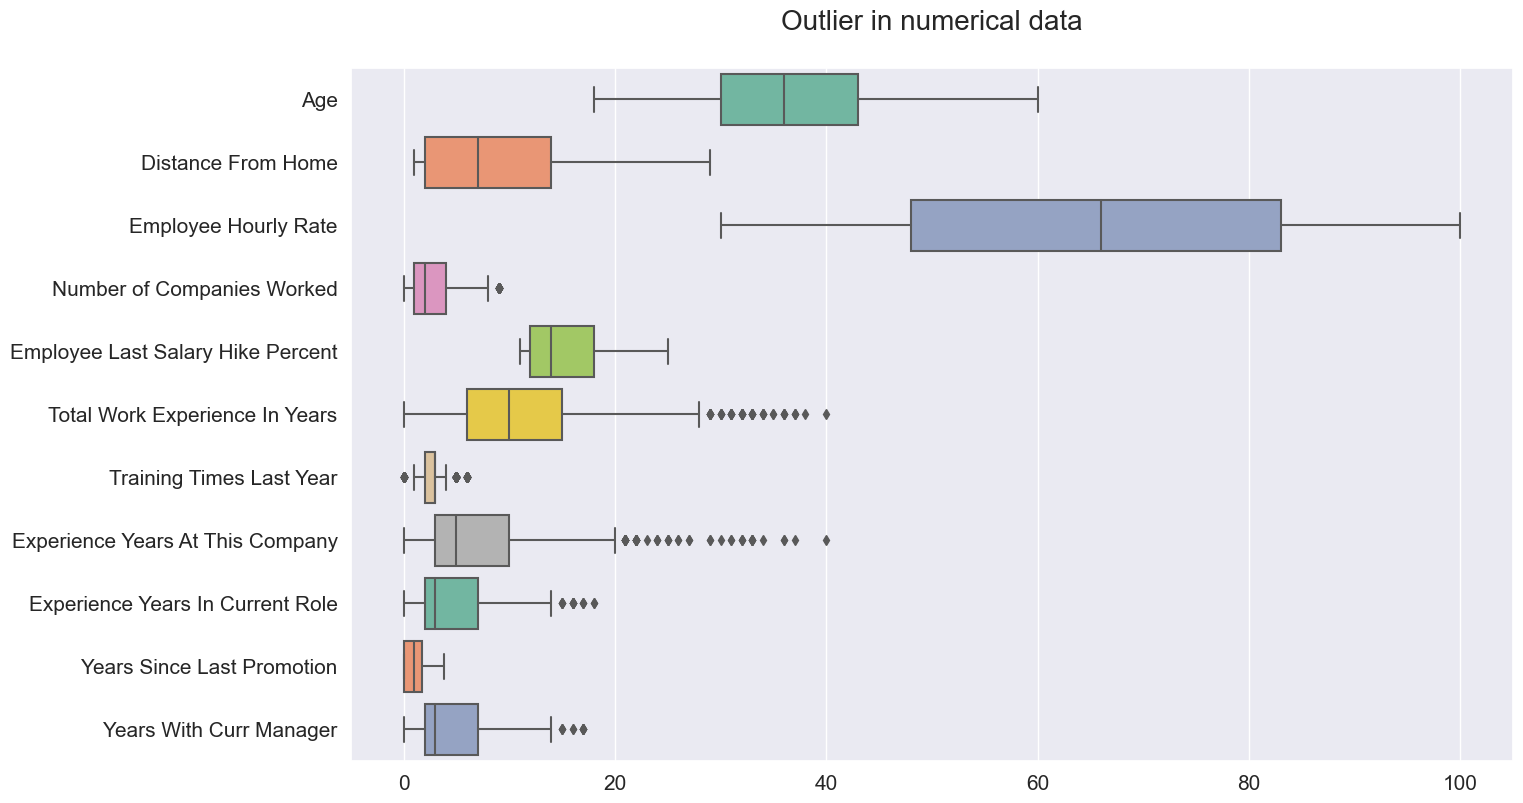

In [29]:
plt.figure(figsize=(15,9))
sns.boxplot(data=num_data, orient="h", palette="Set2")
plt.title("Outlier in numerical data\n",fontsize=20)
plt.show()

## Insights: 

 These columns are having outliers:

- Number of Companies Worked
- Total Work Experience In Years
- Training Times Last Year
- Experience Years At This Company
- Experience Years In CurrentRole
- Years With Curr Manager

# Treatment on outliers data

### 1. Number of companies worked

In [30]:
print(f"\033[1m 10% quantile of Number of Companies Worked : {num_data['Number of Companies Worked'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Number of Companies Worked : {num_data['Number of Companies Worked'].quantile(0.90)}")

 10% quantile of Number of Companies Worked : 0.0
 90% quantile of Number of Companies Worked : 7.0


In [31]:
print(f"\033[1m 10% quantile of Number of Companies Worked : {num_data['Number of Companies Worked'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Number of Companies Worked : {num_data['Number of Companies Worked'].quantile(0.90)}")

 10% quantile of Number of Companies Worked : 0.0
 90% quantile of Number of Companies Worked : 7.0


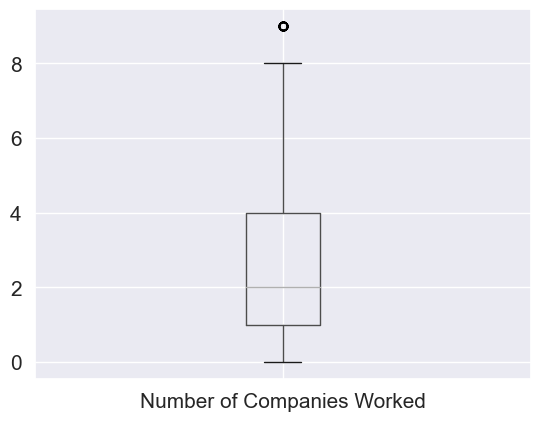

In [32]:
plt.show(num_data.boxplot("Number of Companies Worked"))

## 2. Total Work Experience In Years

In [33]:
print(f"\033[1m 10% quantile of Total Work Experience In Years : {num_data['Total Work Experience In Years'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Total Work Experience In Years : {num_data['Total Work Experience In Years'].quantile(0.90)}")

 10% quantile of Total Work Experience In Years : 3.0
 90% quantile of Total Work Experience In Years : 23.0


In [34]:
num_data["Total Work Experience In Years"] = np.where(num_data["Total Work Experience In Years"] >23.0, 23.0,num_data['Total Work Experience In Years'])
t=skew(num_data["Total Work Experience In Years"])
print("\033[1m Skewness of Total Work Experience In Yearsd : {}".format(t))

 Skewness of Total Work Experience In Yearsd : 0.5337701681831295


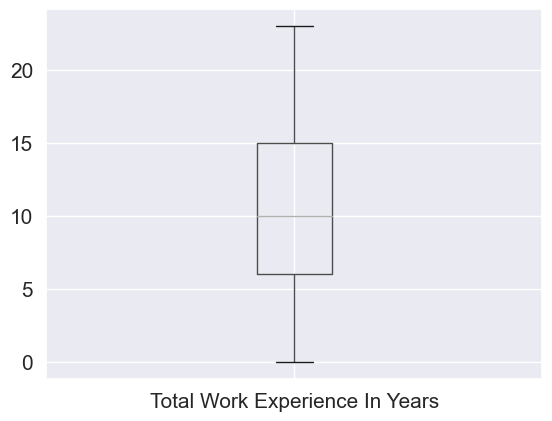

In [35]:
plt.show(num_data.boxplot("Total Work Experience In Years"))

## 3. Training Times Last Year

In [36]:
print(f"\033[1m 10% quantile of Training Times Last Year : {num_data['Training Times Last Year'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Training Times Last Year : {num_data['Training Times Last Year'].quantile(0.90)}")

 10% quantile of Training Times Last Year : 2.0
 90% quantile of Training Times Last Year : 5.0


In [37]:
num_data["Training Times Last Year"] = np.where(num_data["Training Times Last Year"] <1.0, 1.0,num_data['Training Times Last Year'])
num_data["Training Times Last Year"] = np.where(num_data["Training Times Last Year"] >4.0, 4.0,num_data['Training Times Last Year'])
t=skew(num_data["Training Times Last Year"])
print("\033[1m Skewness of Training Times Last Year : {}".format(t))

 Skewness of Training Times Last Year : 0.0014732709380578283


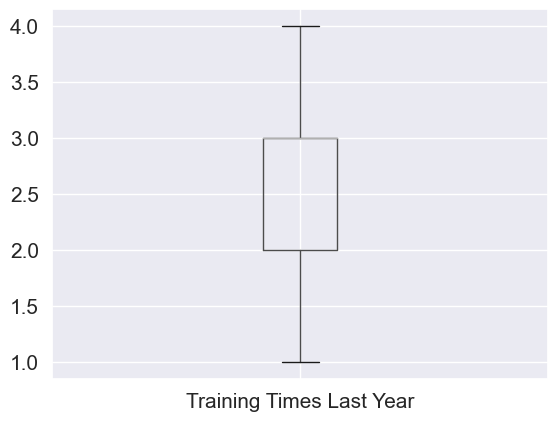

In [38]:
plt.show(num_data.boxplot("Training Times Last Year"))

## 4. Experience Years At This Company

In [39]:
print(f"\033[1m 10% quantile of Experience Years At This Company : {num_data['Experience Years At This Company'].quantile(0.10)}")
print(f"\033[1m 10% quantile of Experience Years At This Company : {num_data['Experience Years At This Company'].quantile(0.90)}")

 10% quantile of Experience Years At This Company : 1.0
 10% quantile of Experience Years At This Company : 15.0


In [40]:
num_data["Experience Years At This Company"] = np.where(num_data["Experience Years At This Company"] >15.0, 15.0,num_data['Experience Years At This Company'])
t=skew(num_data["Experience Years At This Company"])
print("\033[1m Skewness of Experience Years At This Company : {}".format(t))

 Skewness of Experience Years At This Company : 0.573319644340013


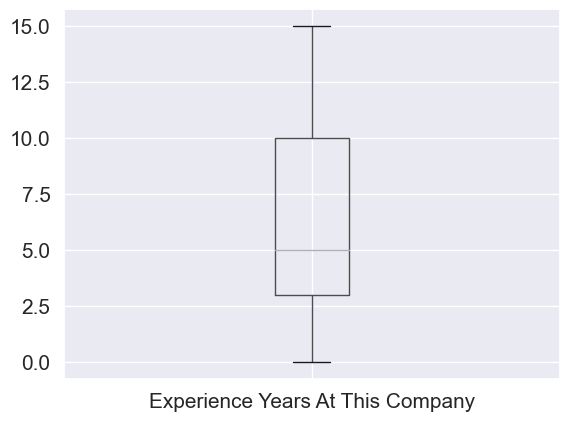

In [41]:
plt.show(num_data.boxplot("Experience Years At This Company"))

## 5. Experience Years In Current Role

In [42]:
print(f"\033[1m 10% quantile of Experience Years In Current Role : {num_data['Experience Years In Current Role'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Experience Years In Current Role : {num_data['Experience Years In Current Role'].quantile(0.90)}")

 10% quantile of Experience Years In Current Role : 0.0
 90% quantile of Experience Years In Current Role : 9.0


In [43]:
num_data["Experience Years In Current Role"] = np.where(num_data["Experience Years In Current Role"] >9.0, 9.0,num_data['Experience Years In Current Role'])
t=skew(num_data["Experience Years In Current Role"])
print("\033[1m Skewness of Experience Years In Current Role : {}".format(t))

 Skewness of Experience Years In Current Role : 0.3070756306977393


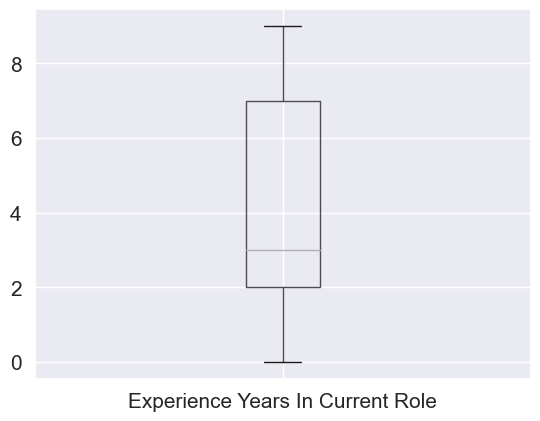

In [44]:
plt.show(num_data.boxplot("Experience Years In Current Role"))

## 6. Years With Curr Manager

In [45]:
print(f"\033[1m 10% quantile of Years With Curr Manager : {num_data['Years With Curr Manager'].quantile(0.10)}")
print(f"\033[1m 10% quantile of Years With Curr Manager : {num_data['Years With Curr Manager'].quantile(0.90)}")

 10% quantile of Years With Curr Manager : 0.0
 10% quantile of Years With Curr Manager : 9.0


In [46]:
num_data["Years With Curr Manager"] = np.where(num_data["Years With Curr Manager"] >9.0, 9.0,num_data['Years With Curr Manager'])
t=skew(num_data["Years With Curr Manager"])
print("\033[1m Skewness of Years With Curr Manager : {}".format(t))

 Skewness of Years With Curr Manager : 0.3378734233306521


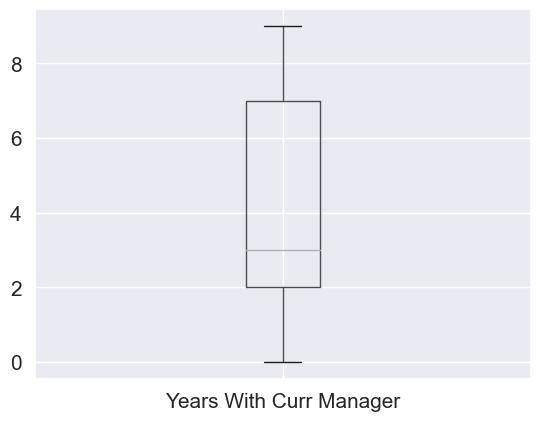

In [47]:
plt.show(num_data.boxplot("Years With Curr Manager"))

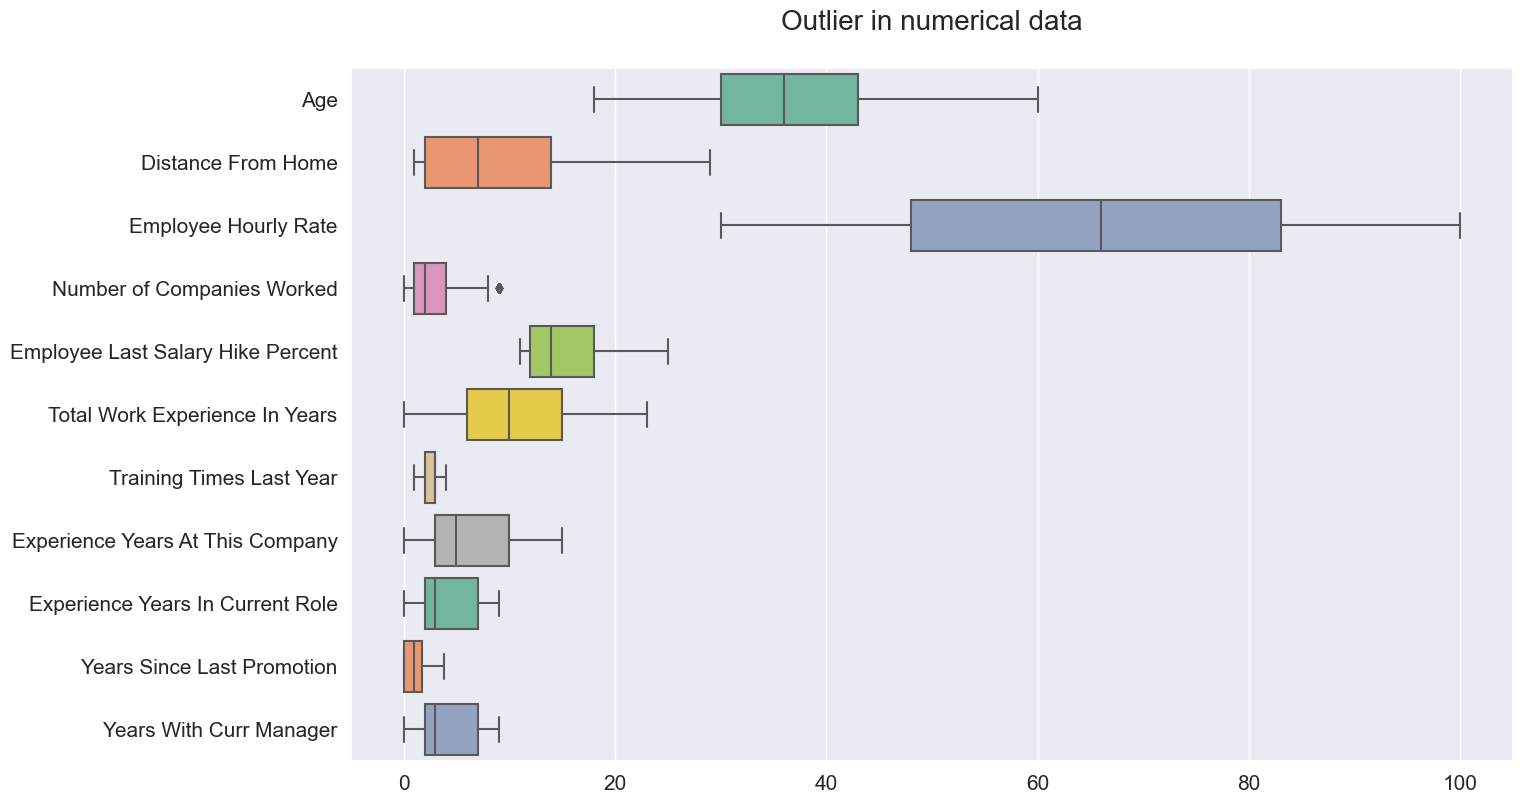

In [48]:
plt.figure(figsize=(15,9))
sns.boxplot(data=num_data, orient="h", palette="Set2")
plt.title("Outlier in numerical data\n",fontsize=20)
plt.show()

# Label Encoding

- ML algorithm dont process with object type data so we have to convert object type data into numerical type data

In [49]:
# Converting Labeled data to Numerical data using label Encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
final_emp1[['Gender', 'Education Background', 'Marital Status','Employees Department', 'Employees Job Role',
       'Business Travel Frequency', 'Over Time', 'Attrition']] = final_emp1[['Gender', 'Education Background', 
       'Marital Status','Employees Department', 'Employees Job Role','Business Travel Frequency', 'Over Time', 
       'Attrition']].apply(label.fit_transform)

#### After Encoding the Dataset:

In [50]:
final_emp1

,Age,Distance From Home,Employee Hourly Rate,Number of Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,...,Employee Work Life Balance,Gender,Education Background,Marital Status,Employees Department,Employees Job Role,Business Travel Frequency,Over Time,Attrition,Performance Rating
0,32,10,55,1,12,10,2,10,7,0.000000,...,2,1,2,2,5,13,2,0,0,3
1,47,14,42,2,12,20,2,7,7,1.000000,...,3,1,2,2,5,13,2,0,0,3
2,40,5,48,5,21,20,2,18,13,1.000000,...,3,1,1,1,5,13,1,1,0,4
3,41,10,73,3,15,23,2,21,6,3.464102,...,2,1,0,0,3,8,2,0,0,3
4,60,16,84,8,14,10,1,2,2,1.414214,...,3,1,2,2,5,13,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,71,1,20,6,3,6,5,0.000000,...,3,0,3,0,5,13,1,1,0,4
1196,37,10,80,3,17,4,2,1,0,0.000000,...,3,1,1,2,1,15,2,0,0,3
1197,50,28,74,1,11,20,3,20,8,1.732051,...,3,1,3,1,1,15,2,1,0,3
1198,34,9,46,1,14,9,3,8,7,2.645751,...,4,0,3,2,0,1,2,0,0,3


In [51]:
# defing Independent variables as X
X = final_emp1.iloc[:,:-1]
# Defing Target variable or dependent variable
y = final_emp1.iloc[:,-1]

In [52]:
X

,Age,Distance From Home,Employee Hourly Rate,Number of Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,...,Employee Relationship Satisfaction,Employee Work Life Balance,Gender,Education Background,Marital Status,Employees Department,Employees Job Role,Business Travel Frequency,Over Time,Attrition
0,32,10,55,1,12,10,2,10,7,0.000000,...,4,2,1,2,2,5,13,2,0,0
1,47,14,42,2,12,20,2,7,7,1.000000,...,4,3,1,2,2,5,13,2,0,0
2,40,5,48,5,21,20,2,18,13,1.000000,...,3,3,1,1,1,5,13,1,1,0
3,41,10,73,3,15,23,2,21,6,3.464102,...,2,2,1,0,0,3,8,2,0,0
4,60,16,84,8,14,10,1,2,2,1.414214,...,4,3,1,2,2,5,13,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,71,1,20,6,3,6,5,0.000000,...,2,3,0,3,0,5,13,1,1,0
1196,37,10,80,3,17,4,2,1,0,0.000000,...,1,3,1,1,2,1,15,2,0,0
1197,50,28,74,1,11,20,3,20,8,1.732051,...,3,3,1,3,1,1,15,2,1,0
1198,34,9,46,1,14,9,3,8,7,2.645751,...,2,4,0,3,2,0,1,2,0,0


# Checking for Imbalance data

In [53]:
y.value_counts(normalize=True)*100

Performance Rating
3    72.833333
2    16.166667
4    11.000000
Name: proportion, dtype: float64

- The data is imbalanced. If we continue use this data,it will lead to bias the output.so we have to balance the data.

# Handling Imbalanced data

#### Converting Imbalance data into balanced data

- Balancing data with SMOTE Technique gives more number of NaN values
- so, we use RandomOverSampler Technique to balance the data

In [54]:
# Imports
from imblearn.over_sampling import RandomOverSampler,SMOTENC,SMOTE
# Intilizing the model
oversampling = RandomOverSampler()
X_smote, y_smote = oversampling.fit_resample(X,y)
X_smote = pd.DataFrame(X_smote)
X_smote.columns = ['Age', 'Distance From Home', 'Employee Hourly Rate',
       'Number of Companies Worked', 'Employee Last Salary Hike Percent',
       'Total Work Experience In Years', 'Training Times Last Year',
       'Experience Years At This Company', 'Experience Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager',
       'Employee Education Level', 'Employee Environment Satisfaction',
       'Employee Job Involvement', 'Employee Job Level',
       'Employee Job Satisfaction', 'Employee Relationship Satisfaction',
       'Employee Work Life Balance', 'Gender', 'Education Background',
       'Marital Status', 'Employees Department', 'Employees Job Role',
       'Business Travel Frequency', 'Over Time', 'Attrition']
X_smote

,Age,Distance From Home,Employee Hourly Rate,Number of Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,...,Employee Relationship Satisfaction,Employee Work Life Balance,Gender,Education Background,Marital Status,Employees Department,Employees Job Role,Business Travel Frequency,Over Time,Attrition
0,32,10,55,1,12,10,2,10,7,0.000000,...,4,2,1,2,2,5,13,2,0,0
1,47,14,42,2,12,20,2,7,7,1.000000,...,4,3,1,2,2,5,13,2,0,0
2,40,5,48,5,21,20,2,18,13,1.000000,...,3,3,1,1,1,5,13,1,1,0
3,41,10,73,3,15,23,2,21,6,3.464102,...,2,2,1,0,0,3,8,2,0,0
4,60,16,84,8,14,10,1,2,2,1.414214,...,4,3,1,2,2,5,13,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,46,2,69,8,23,28,2,26,15,3.872983,...,1,3,0,2,1,5,8,2,0,0
2618,27,10,32,1,21,9,4,9,7,1.000000,...,3,2,1,1,0,1,3,1,0,0
2619,26,7,76,1,20,7,5,7,7,2.236068,...,3,3,1,3,2,2,4,0,0,0
2620,43,21,61,7,20,8,1,3,2,1.000000,...,1,3,1,3,1,1,3,1,0,0


In [55]:
y_smote.value_counts(normalize=True)*100

Performance Rating
3    33.333333
4    33.333333
2    33.333333
Name: proportion, dtype: float64

#### Now the data is balanced

# EDA (Exploratory Data Anaysis)

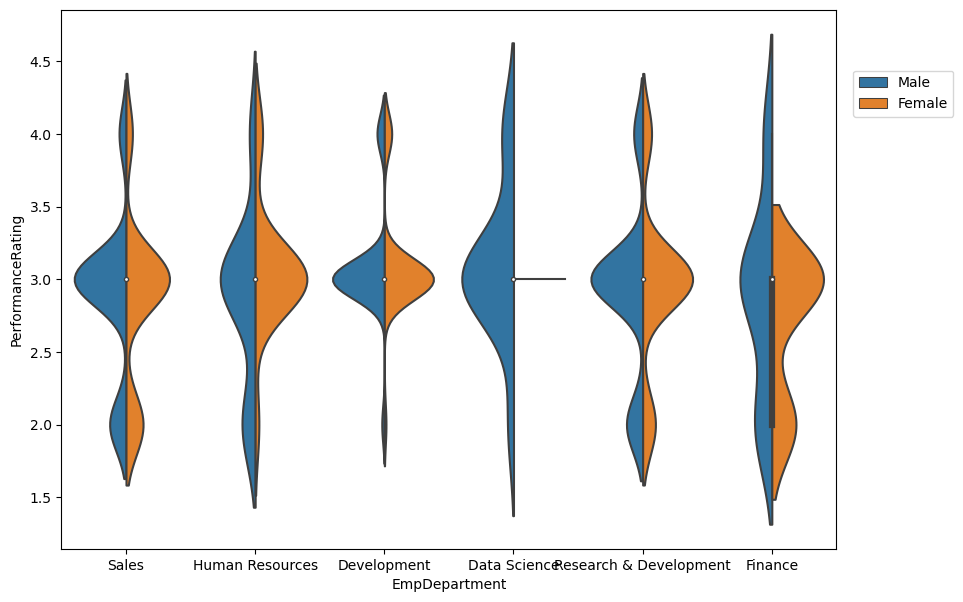

In [6]:
#plotted the graph by using violin plot
plt.rcParams["figure.figsize"]=10,7
ax = sns.violinplot(x="EmpDepartment", y="PerformanceRating" , hue="Gender",
                    data=emp1, palette="tab10", split=True)
plt.legend(bbox_to_anchor=(1.16, 0.9))

<Axes: xlabel='EmpDepartment'>

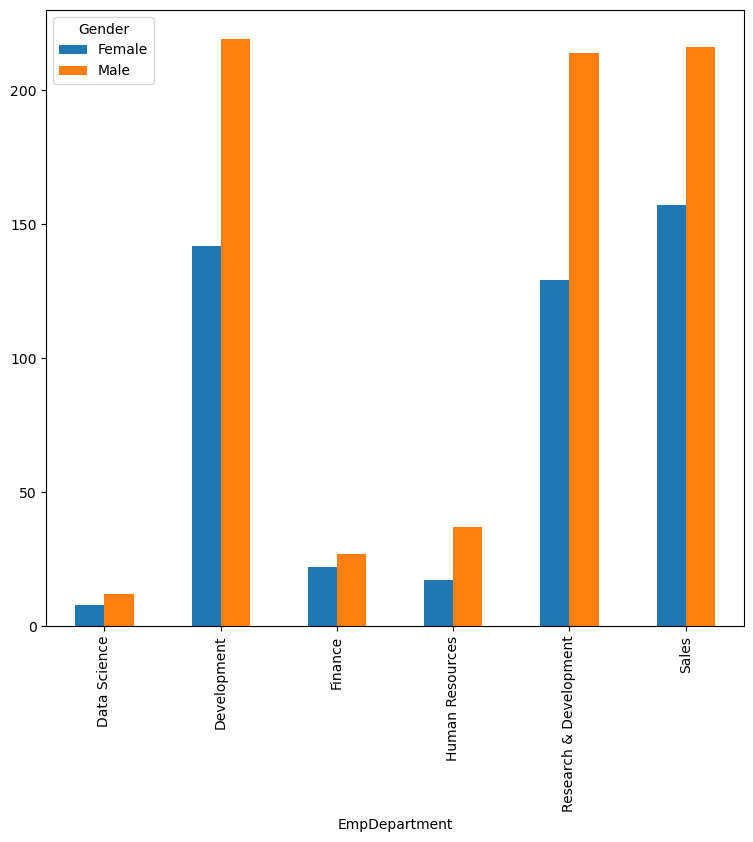

In [7]:
#plotting departmentwise Gender
plt = emp1.groupby("EmpDepartment").Gender.value_counts().sort_values(ascending=False)
plt.unstack().plot(kind="bar",figsize=(9,8),width=0.5)

#### INSIGHTS:

- From the development department male performance rating the little bit higher compared to female. 
- In sales department female category is higher than male catogory.

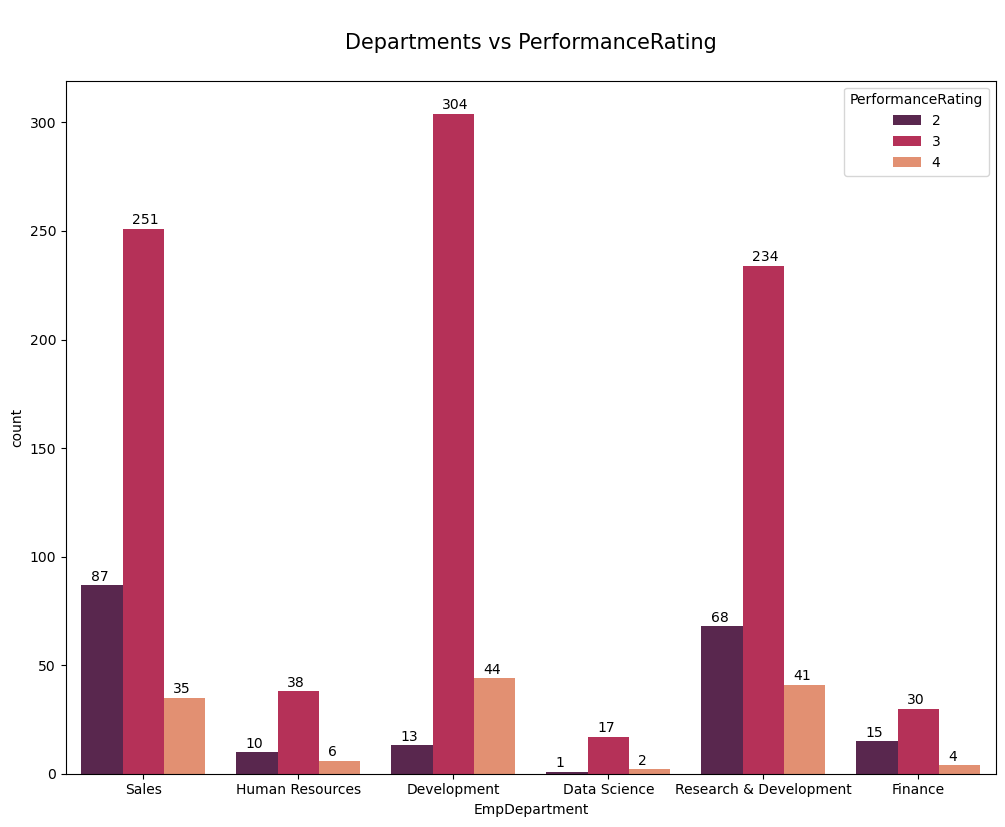

In [12]:
# plotting the graph by using countplot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
ax = sns.countplot(x=emp1['EmpDepartment'],hue= emp1["PerformanceRating"],palette='rocket')
plt.title("\nDepartments vs PerformanceRating\n",fontsize=15,color='black')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+2))
plt.show()

#### INSIGHTS:

- From the above graph we can conclude that from the EmpDepartment Development dept is showing High performance rating.

In [13]:
#Percent count of EmpDepartment with performance Rating

print("\033[1m\nPercent count of EmpDepartment with Performance Rating:")
t = pd.crosstab(emp1["PerformanceRating"], emp1["EmpDepartment"], margins=True,normalize=True)
round(t.multiply(100),2)


Percent count of EmpDepartment with Performance Rating:


EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


# Performance Rating With Respect To Gender

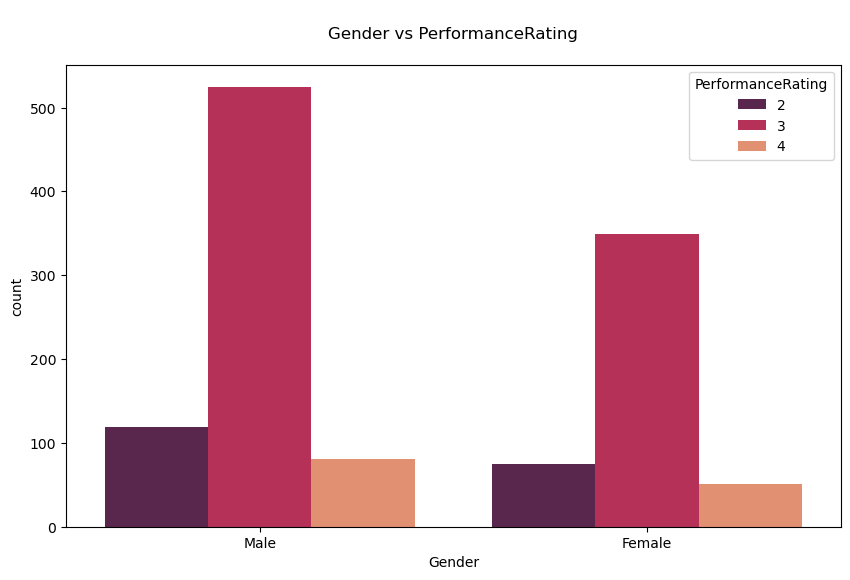

In [13]:
#Plotting the graph for gender
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(x=emp1["Gender"],hue= emp1['PerformanceRating'],palette='rocket')
plt.title("\nGender vs PerformanceRating\n")
#plt.legend(bbox_to_anchor=(1.0, 0.9))
plt.show()

##### INSIGHTS:

- The male performance rating the little bit higher compared to female.

# Age Analysis

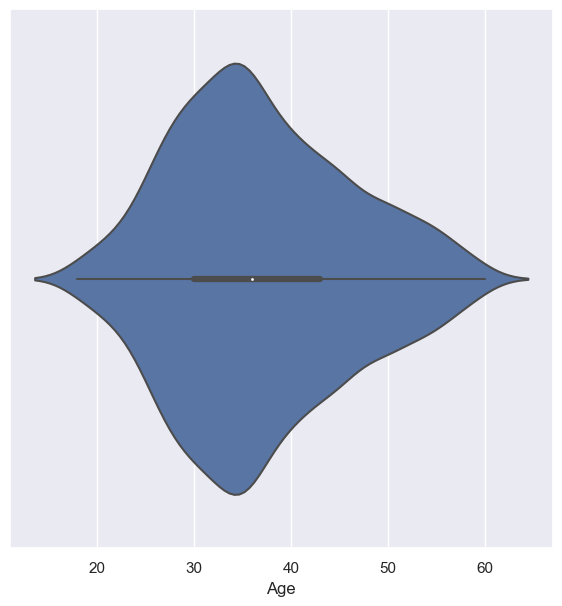

In [15]:
# showing age analysis using violin plot 
plt.figure(figsize=(7,7))
sns.set_theme(style="darkgrid")
sns.violinplot(x=emp1["Age"])
plt.show()

#### INSIGHTS

- The age distribution is starting from 18 to 60 where the most of the employees are lying between 30 to 40 age count.

# EmpLastSalaryHikePercent vs Performance 

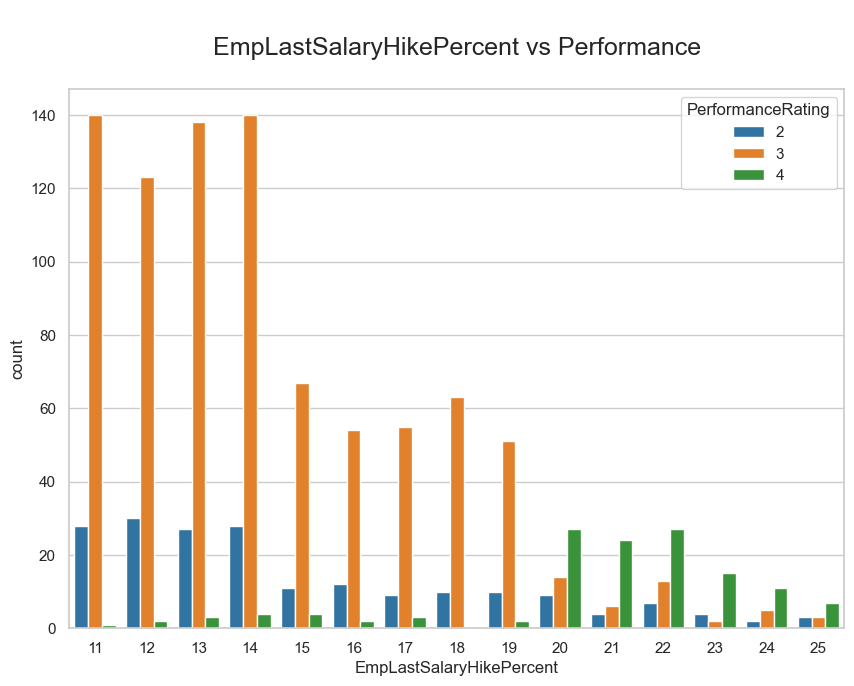

In [9]:
## To plot the graph EmpLastSalaryHikePercent vs Performance 
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.countplot(x=emp1['EmpLastSalaryHikePercent'],hue= emp1["PerformanceRating"],palette='tab10')
plt.title("\nEmpLastSalaryHikePercent vs Performance\n",fontsize=18)
plt.show()

#### INSIGHTS :  From the above graph

- More Number of Employees whose salary hike percentage belongs to 11-14 % are getting high performance rating.
 - Employees whose salary hike percentage is in between 20-22%, There performance rating is 4
- Number of Employees belongs to 15-19% are moderate in number while employees belongs to 20-25% salary hike percent are in less in number.

# ExperienceYearsInCurrentRole vs Performance 

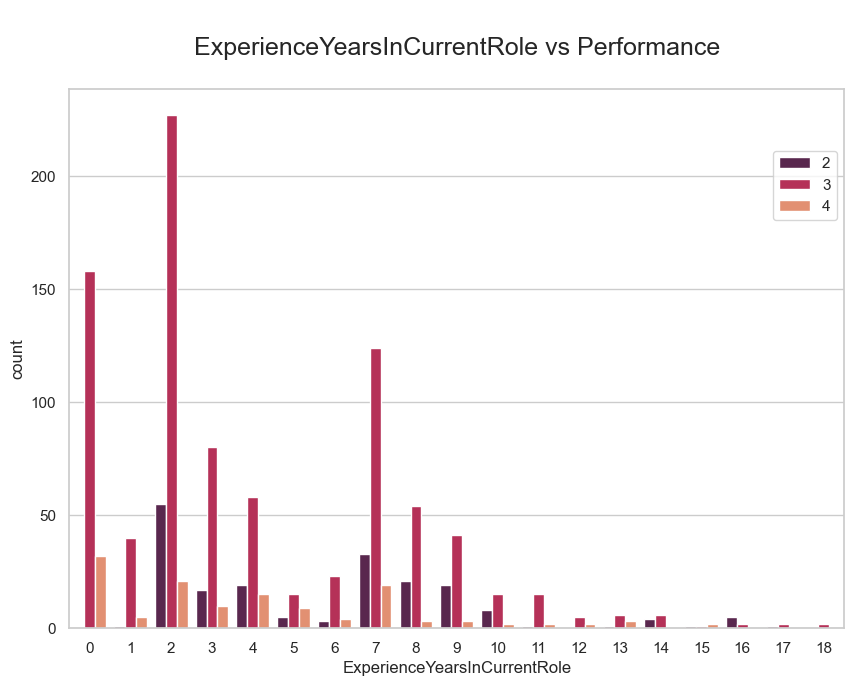

In [12]:
## To plot the graph ExperienceYearsInCurrentRole vs Performance 

plt.figure(figsize=(10,7))
ax = sns.countplot(x=emp1['ExperienceYearsInCurrentRole'],hue= emp1["PerformanceRating"],palette='rocket')
plt.title("\nExperienceYearsInCurrentRole vs Performance\n",fontsize=18)
plt.legend(bbox_to_anchor=(1.0, 0.9))
plt.show()

##### INSIGHTS : From the above graph

- In given dataset,more number of employees have 2 years of experience for current role. which gives good performance rating.
- Employees which have more than 9 year of experience are less in number & their performance is not so good for current role.
- Employees which is fresher are moderate in number and their performance rating is seems to be good.

 # EmpWorkLifeBalance vs Performance

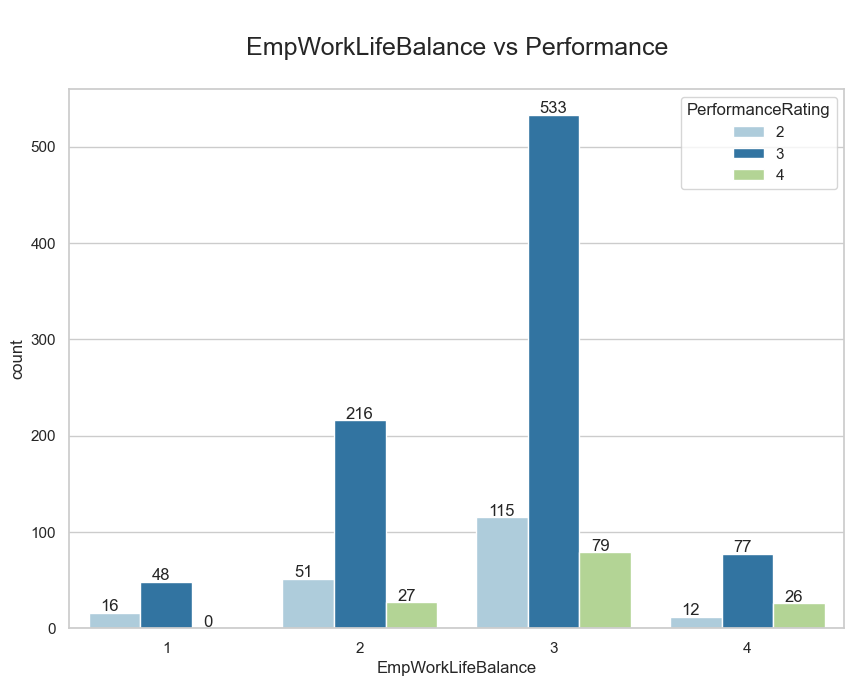

In [13]:
## To plot the graph EmpWorkLifeBalance vs Performance

plt.figure(figsize=(10,7))
ax = sns.countplot(x=emp1['EmpWorkLifeBalance'],hue= emp1["PerformanceRating"],palette='Paired')
plt.title("\nEmpWorkLifeBalance vs Performance\n",fontsize=18)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+2))
plt.show()

#### INSIGHTS

- In EmpWorkLifeBalance, level 3 is showing high Performance Rating of employees.
- In given datastet, level 1 & level 4 employees are less in number.

# Relationship Between EmpDepartment vs EmpjobRole

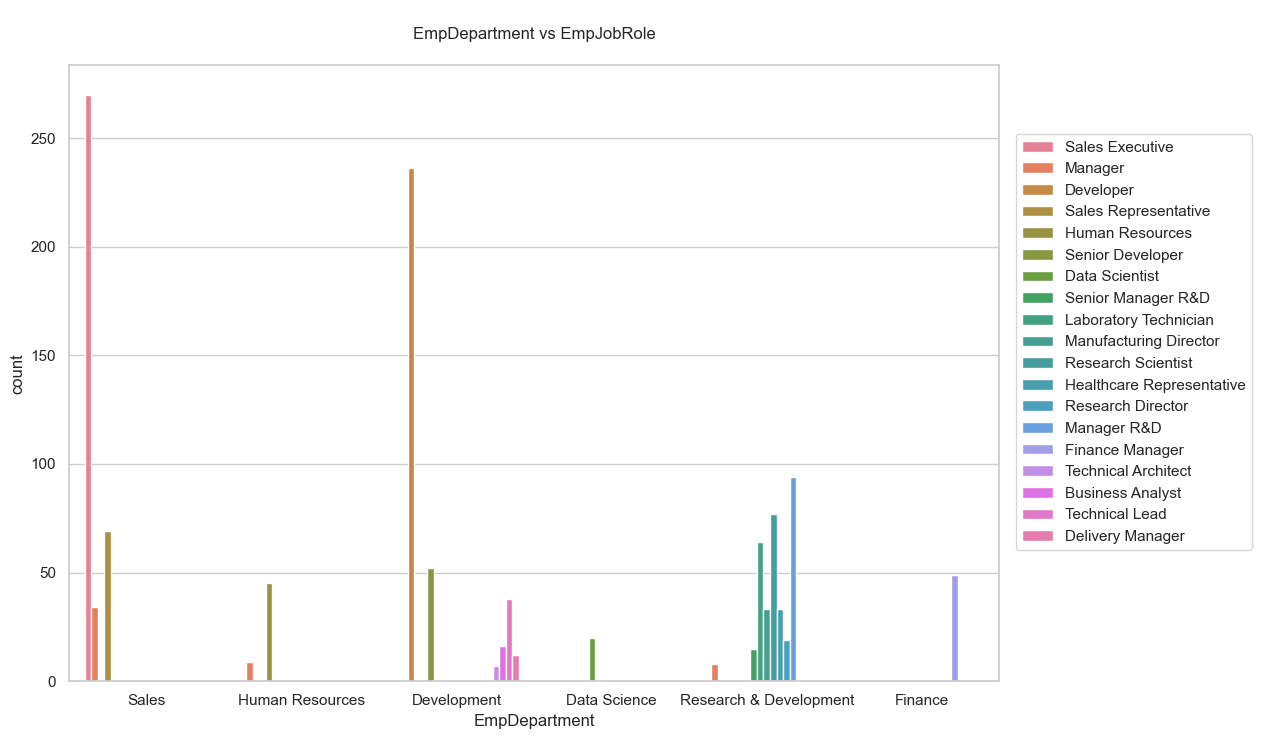

In [14]:
## To visualize the relationship between EmpDepartment vs EmpjobRole

plt.figure(figsize=(12,8))
sns.countplot(x=emp1["EmpDepartment"],hue= emp1['EmpJobRole'],palette='husl')
plt.title("\nEmpDepartment vs EmpJobRole\n")
plt.legend(bbox_to_anchor=(1.01, 0.9))
plt.show()


###### INSIGHTS

- EmpDepartment is highly correlated with EmpJobRole

In [24]:
# Percent count of Gender with MaritalStatus

print("\033[1m\nPercent count of Gender with MaritalStatus:")
pd.crosstab(emp1["MaritalStatus"], emp1["Gender"], margins=True)


Percent count of Gender with MaritalStatus:


Gender,Female,Male,All
MaritalStatus,,,
Divorced,98,170,268
Married,215,333,548
Single,162,222,384
All,475,725,1200


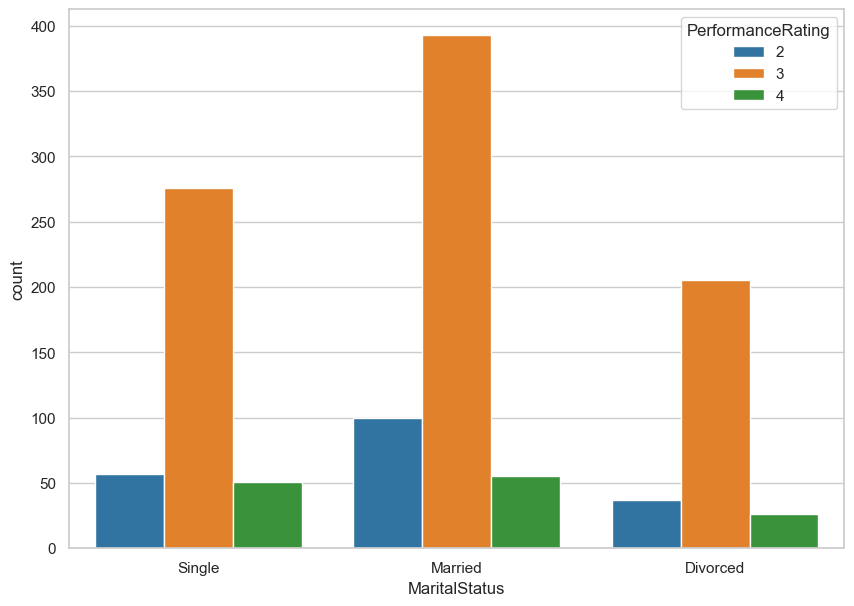

In [10]:
## Plotting the graph for Marital Status

plt.figure(figsize=(10,7))
ax = sns.countplot(x=emp1['MaritalStatus'],hue= emp1["PerformanceRating"],palette='tab10')

##### INSIGHTS

- Married, Single & Divorced employees gives good performance rating.
- In given dataset, married employees are more in number after that Single & Divorced employees.

# Correlation with target variable

- Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate in relation to each other. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.
-  Here, target variable is Performance Rating

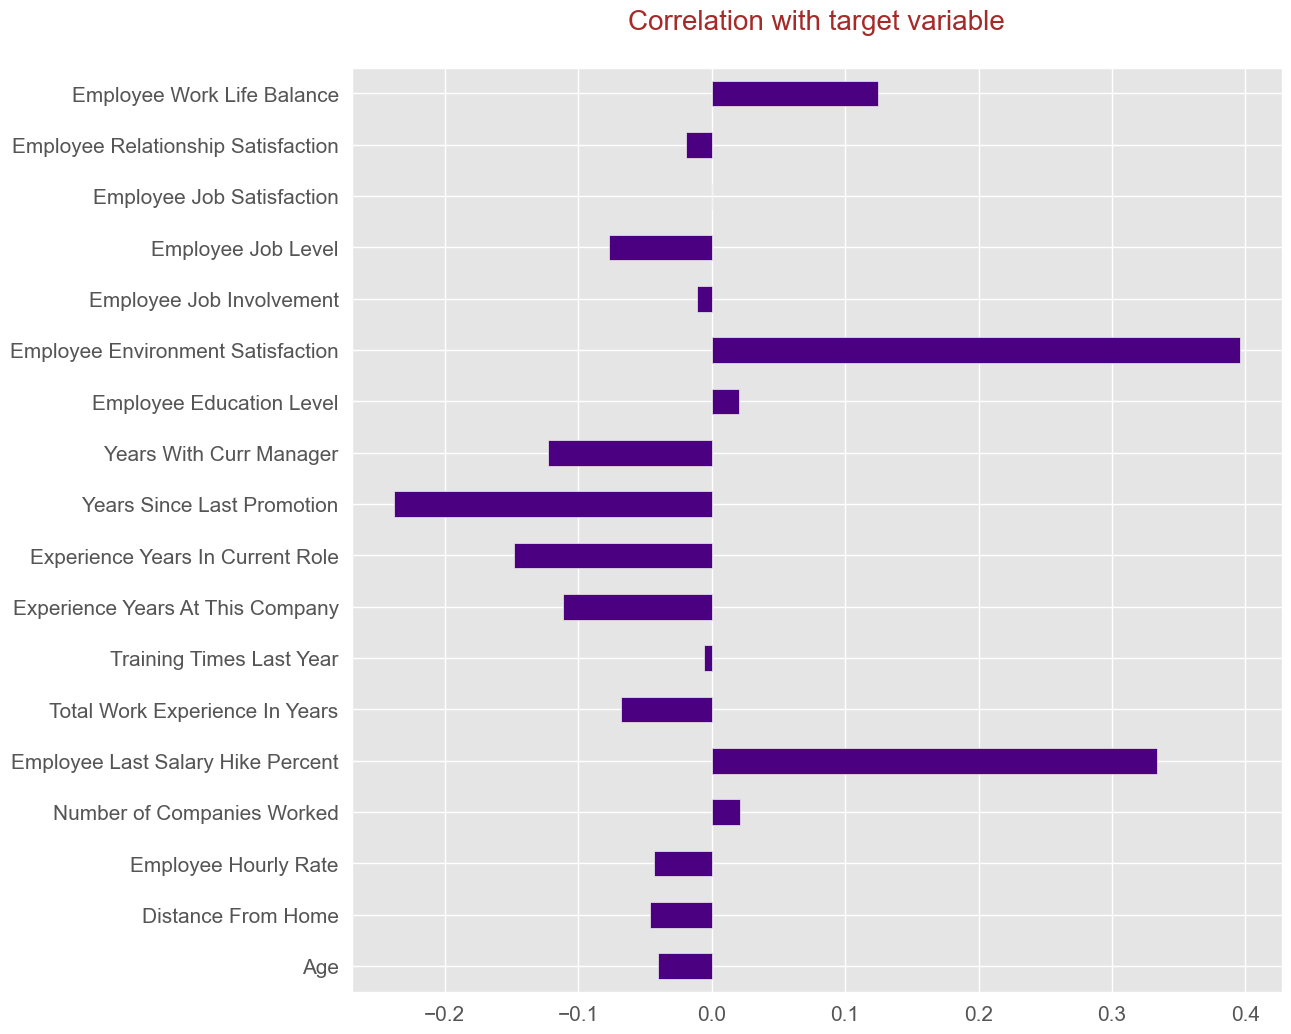

In [49]:
# Select only numeric columns in X
numeric_columns_X = X.select_dtypes(include=['float64', 'int64'])

# Calculate correlation with y for selected numeric columns
correlation_values = numeric_columns_X.corrwith(y)

# Plotting
plt.style.use('ggplot')
ax = correlation_values.plot(kind='barh', grid=True, figsize=(12, 12), color='indigo')
plt.title("Correlation with target variable\n", size=20, color="brown")
plt.xticks(size=15)
plt.yticks(size=15)
ax.xaxis.label.set_color('blue')
ax.yaxis.label.set_color('brown')
plt.show()

###### There are variables are positively correlated with performance rating( Target variable)


- Employee Environment Satisfaction
- Employee Last Salary Hike Percent
- Employee Work Life Balance
- Over Time
- Marital Status
- Number Companies Worked
- Employees Education Level
- Education Background

# Correlation of heat map

- Correlation is a statistical measure that expresses the extent to which two variables are linearly related (means they change together at a constant rate)

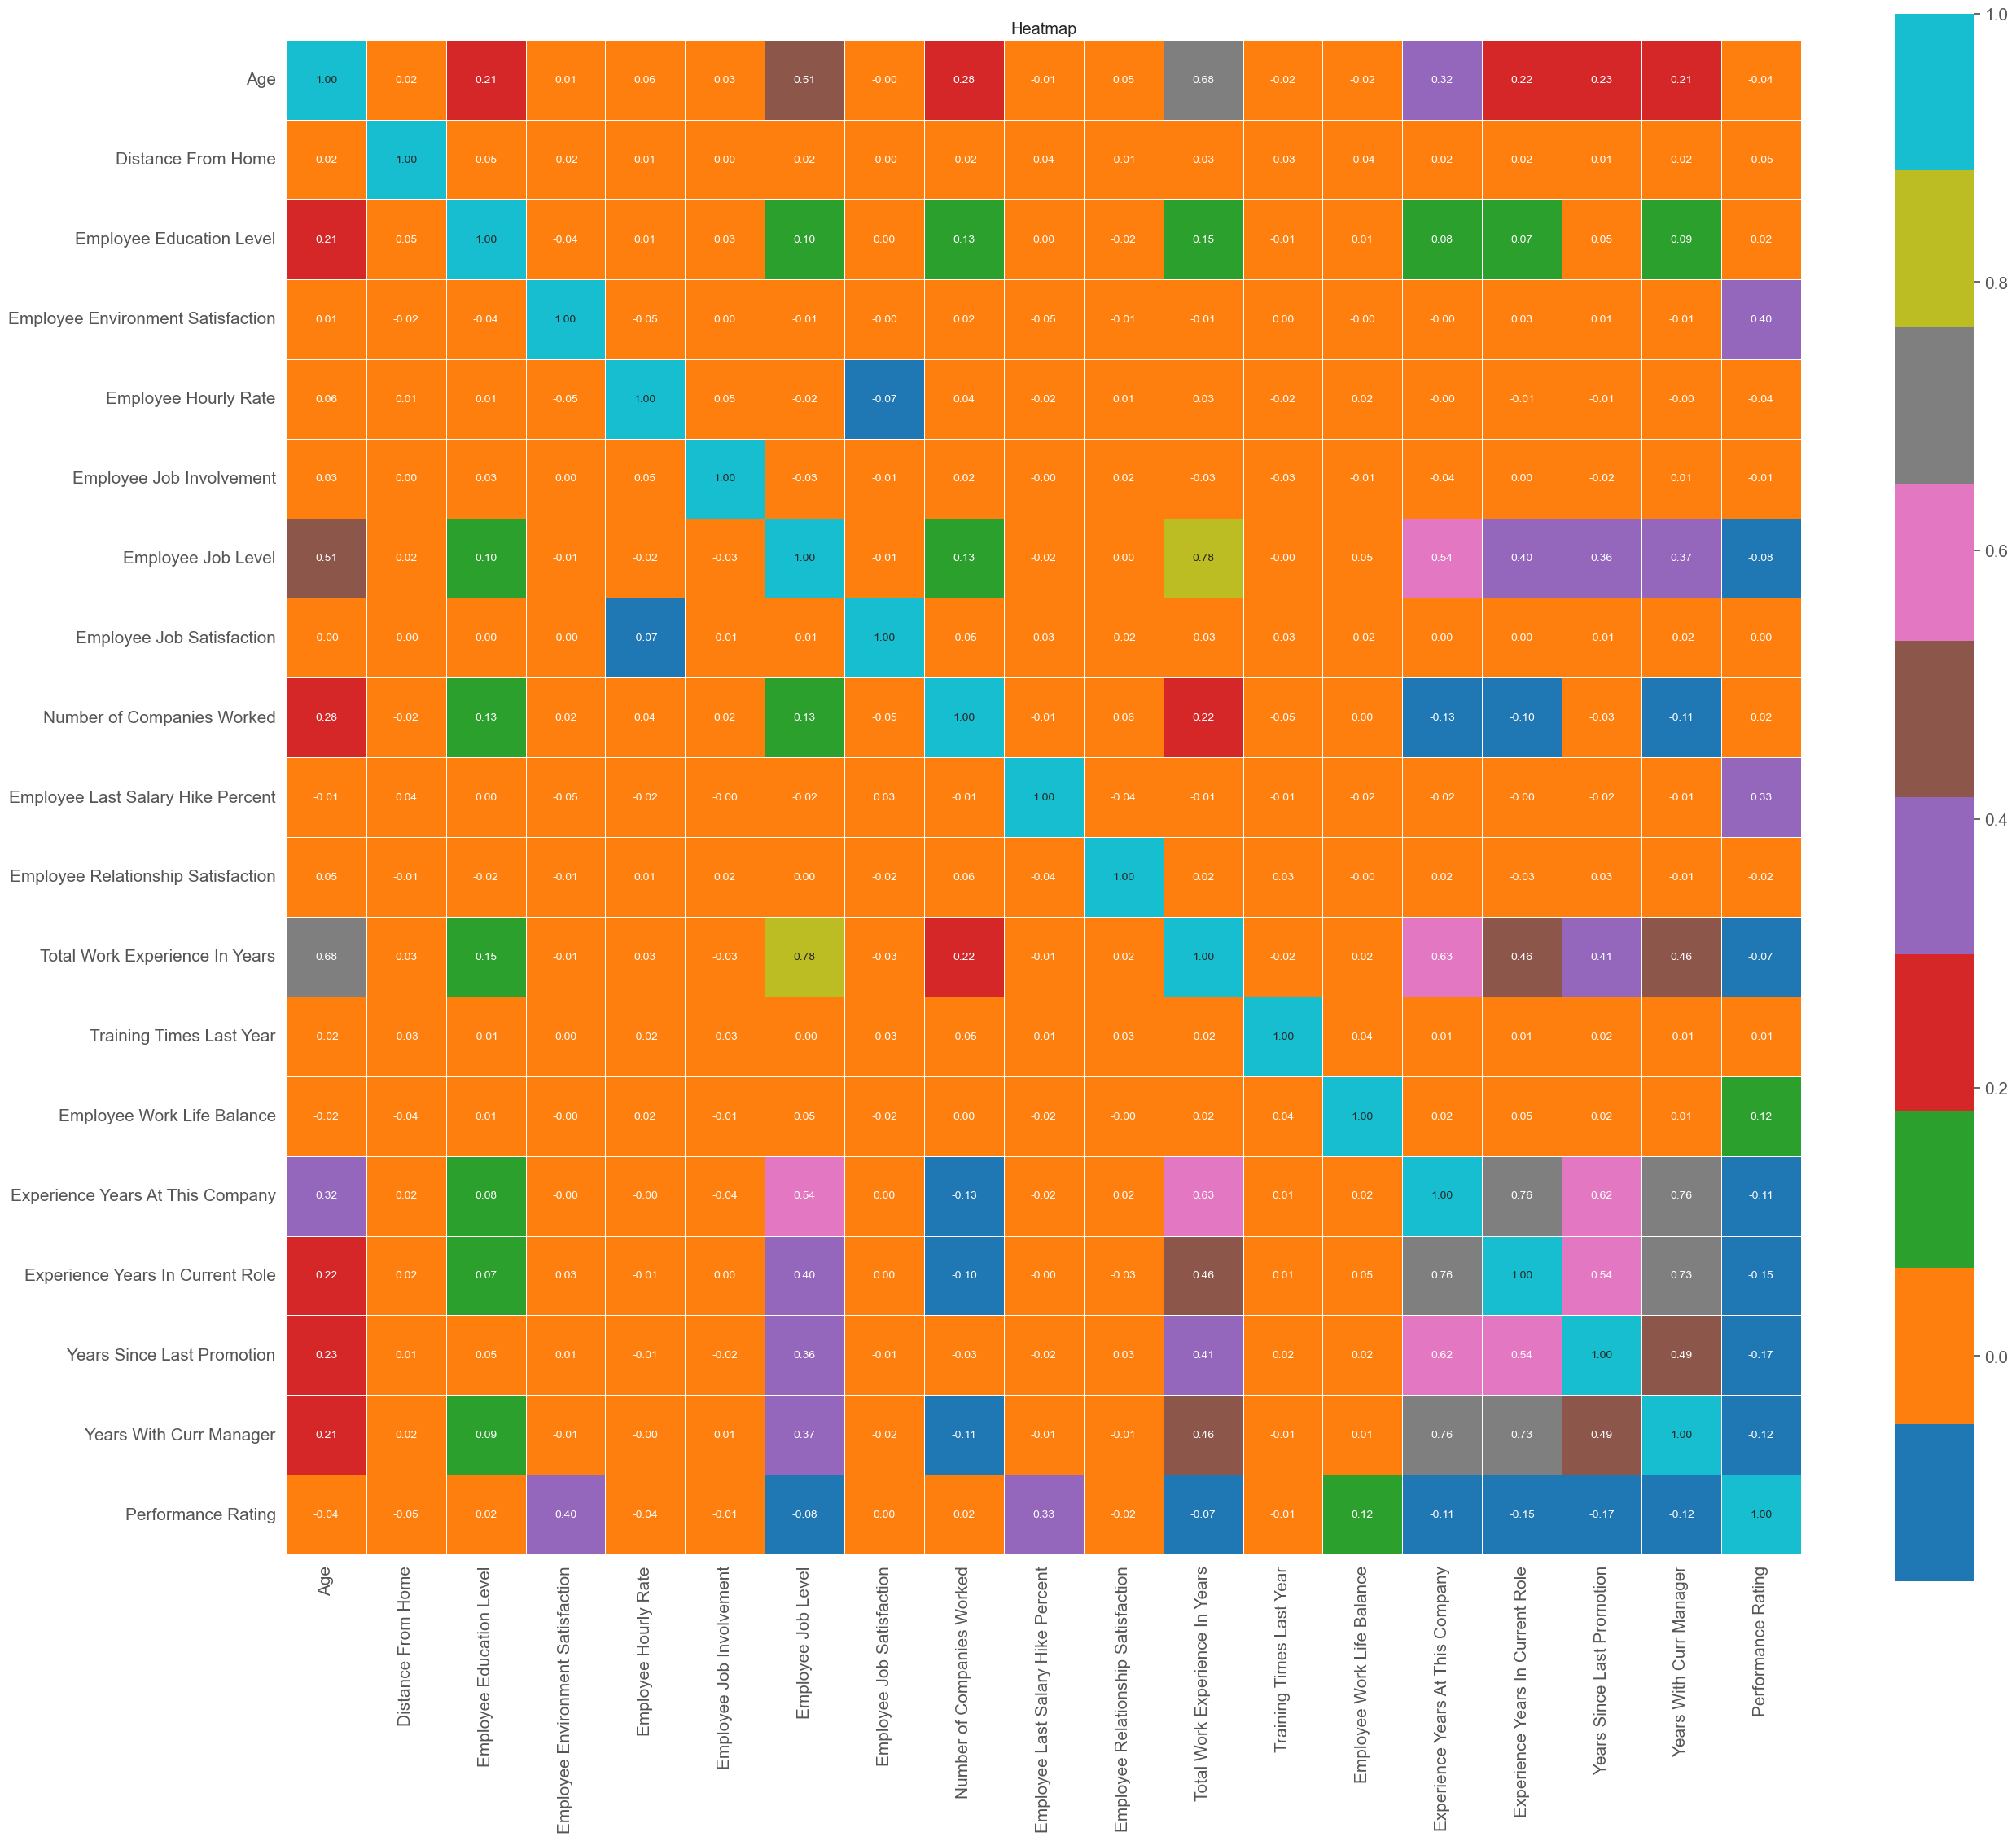

In [52]:
import seaborn as sns

# Select only numeric columns in emp1
numeric_columns_emp1 = emp1.select_dtypes(include=['float64', 'int64'])

# Create a heatmap of the correlation matrix of selected numeric columns
plt.figure(figsize=(30, 25))
plt.title('Heatmap')
sns.despine()
sns.heatmap(numeric_columns_emp1.corr(), linewidths=0.6, annot=True, square=True, fmt='.2f', cmap='tab10')
plt.show()

#### These three variables are positively correlated with performance rating( Target variable)

- 1.Emp Environment Satisfaction
- 2.Emp Last Salary Hike Percent
- 3.Emp Work Life Balance

# Feature Selection

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2,k=15)
fit = bestfeatures.fit(X_smote,y_smote)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_smote.columns)

featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['feature_names','Scores']

print(f"\033[32m{featurescores.nlargest(5,'Scores')}")

                        feature_names       Scores
4   Employee Last Salary Hike Percent  1299.021749
12  Employee Environment Satisfaction   468.197653
7    Experience Years At This Company   386.956684
8    Experience Years In Current Role   331.928678
9          Years Since Last Promotion   317.204080


##### From Feature Selection Technique. We get Top 5 features which effect the Target variable Performance Rating

- 1.Emp Last Salary Hike Percent
- 2.Years Since Last Promotion
- 3.Experience Years At This Company
- 4.Emp Environment Satisfaction
- 5.Experience Years InCurrentRole

# Model Creation And Selection

In [56]:
# Assuming X_over is your dataset and y_over is your target variable

# Define X with specific columns from X_over as predictor variables
X = X_smote[['Employee Last Salary Hike Percent', 'Experience Years At This Company',
            'Employee Environment Satisfaction', 'Experience Years In Current Role',
            'Years Since Last Promotion']]

# Define y as the target variable from y_over
y = y_smote

# Training the Data

In [57]:
# spliting Train data and Test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((2097, 5), (525, 5), (2097,), (525,))

# Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
# Making predictions on training and testing sets
y_predict_train = rf.predict(X_train)
y_predict_test = rf.predict(X_test)

In [60]:
# Evaluating the model
print(f"\033[1mTraining Accuracy score: {round(accuracy_score(y_train, y_predict_train) * 100, 2)} %\n")
print(f"Testing Accuracy score: {round(accuracy_score(y_test, y_predict_test) * 100, 2)} %\n")
print("Classification Report\n")
print(classification_report(y_test, y_predict_test))

Training Accuracy score: 98.57 %

Testing Accuracy score: 94.48 %

Classification Report

              precision    recall  f1-score   support

           2       0.92      0.98      0.95       184
           3       0.96      0.87      0.91       173
           4       0.95      0.99      0.97       168

    accuracy                           0.94       525
   macro avg       0.95      0.94      0.94       525
weighted avg       0.95      0.94      0.94       525



# Support Vector Machines

In [61]:
from sklearn.svm import SVC
# Initializing and training the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [62]:
# Making predictions on training and testing sets
svm_predictions_train = svm_model.predict(X_train)
svm_predictions_test = svm_model.predict(X_test)


In [63]:
# Evaluating the model
print(f"\033[1mTraining Accuracy score: {round(accuracy_score(y_train, svm_predictions_train) * 100, 2)} %\n")
print(f"Testing Accuracy score: {round(accuracy_score(y_test, svm_predictions_test) * 100, 2)} %\n")
print("Classification Report\n")
print(classification_report(y_test, svm_predictions_test))

Training Accuracy score: 87.55 %

Testing Accuracy score: 87.81 %

Classification Report

              precision    recall  f1-score   support

           2       0.89      0.95      0.92       184
           3       0.84      0.82      0.83       173
           4       0.91      0.86      0.88       168

    accuracy                           0.88       525
   macro avg       0.88      0.88      0.88       525
weighted avg       0.88      0.88      0.88       525



# XGB Classifier

In [64]:
from xgboost import XGBClassifier
ab = XGBClassifier()
y_train_adjusted = y_train - min(y_train)
ab.fit(X_train,y_train_adjusted)
# Making predictions on training and testing sets
ab_pred_train = ab.predict(X_train)
ab_pred_test = ab.predict(X_test)

In [65]:
# Adjusting predictions back to the original scale
ab_pred_train_original = ab_pred_train + min(y_train)
ab_pred_test_original = ab_pred_test + min(y_train)

In [66]:
#Evaluating the model
print(f"\033[1mTraining Accuracy score: {round(accuracy_score(y_train, ab_pred_train_original) * 100, 2)} %\n")
print(f"Testing Accuracy score: {round(accuracy_score(y_test, ab_pred_test_original) * 100, 2)} %\n")
print("Classification Report\n")
print(classification_report(y_test, ab_pred_test_original))

Training Accuracy score: 98.38 %

Testing Accuracy score: 66.1 %

Classification Report

              precision    recall  f1-score   support

           2       0.87      0.40      0.54       184
           3       0.50      0.91      0.65       173
           4       0.91      0.69      0.79       168

    accuracy                           0.66       525
   macro avg       0.76      0.67      0.66       525
weighted avg       0.76      0.66      0.66       525



 # Logistic Regression
 

In [67]:
from sklearn.linear_model import LogisticRegression
# Initializing and training the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [68]:
# Making predictions on training and testing sets
logreg_predictions_train = logreg_model.predict(X_train)
logreg_predictions_test = logreg_model.predict(X_test)
# Evaluating the model
print(f"\033[1mTraining Accuracy score: {round(accuracy_score(y_train, logreg_predictions_train) * 100, 2)} %\n")
print(f"Testing Accuracy score: {round(accuracy_score(y_test, logreg_predictions_test) * 100, 2)} %\n")
print("Classification Report\n")
print(classification_report(y_test, logreg_predictions_test))

Training Accuracy score: 77.06 %

Testing Accuracy score: 75.43 %

Classification Report

              precision    recall  f1-score   support

           2       0.78      0.77      0.78       184
           3       0.69      0.64      0.67       173
           4       0.78      0.85      0.81       168

    accuracy                           0.75       525
   macro avg       0.75      0.75      0.75       525
weighted avg       0.75      0.75      0.75       525



# BaggingClassifier with DecisionTreeClassifier

In [69]:
#  BaggingClassifier is used with a base model of DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Initializing the base model (Decision Tree in this case)
base_model = DecisionTreeClassifier()

# Initializing and training the BaggingClassifier model
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Making predictions on training and testing sets
bagging_pred_train = bagging_model.predict(X_train)
bagging_pred_test = bagging_model.predict(X_test)

In [70]:
# Evaluating the model
print(f"\033[1mTraining Accuracy score: {round(accuracy_score(y_train, bagging_pred_train) * 100, 2)} %\n")
print(f"Testing Accuracy score: {round(accuracy_score(y_test, bagging_pred_test) * 100, 2)} %\n")
print("Classification Report\n")
print(classification_report(y_test, bagging_pred_test))

Training Accuracy score: 98.24 %

Testing Accuracy score: 93.14 %

Classification Report

              precision    recall  f1-score   support

           2       0.91      0.95      0.93       184
           3       0.92      0.87      0.89       173
           4       0.97      0.97      0.97       168

    accuracy                           0.93       525
   macro avg       0.93      0.93      0.93       525
weighted avg       0.93      0.93      0.93       525



# KNN

In [71]:
# using k-Nearest Neighbors (KNN) 
from sklearn.neighbors import KNeighborsClassifier
# Initializing the KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn_model.fit(X_train, y_train)

# Making predictions on training and testing sets
knn_pred_train = knn_model.predict(X_train)
knn_pred_test = knn_model.predict(X_test)

In [72]:
# Evaluating the model
print(f"\033[1mTraining Accuracy score: {round(accuracy_score(y_train, knn_pred_train) * 100, 2)} %\n")
print(f"Testing Accuracy score: {round(accuracy_score(y_test, knn_pred_test) * 100, 2)} %\n")
print("Classification Report\n")
print(classification_report(y_test, knn_pred_test))

Training Accuracy score: 93.42 %

Testing Accuracy score: 89.52 %

Classification Report

              precision    recall  f1-score   support

           2       0.91      0.94      0.92       184
           3       0.92      0.75      0.83       173
           4       0.87      0.99      0.93       168

    accuracy                           0.90       525
   macro avg       0.90      0.90      0.89       525
weighted avg       0.90      0.90      0.89       525



#  ANN Using MLPClassifier

In [73]:
# using MLPClassifier from scikit-learn for an Artificial Neural Network (ANN):
from sklearn.neural_network import MLPClassifier
# Initializing the MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Training the model
mlp_model.fit(X_train, y_train)

# Making predictions on training and testing sets
mlp_pred_train = mlp_model.predict(X_train)
mlp_pred_test = mlp_model.predict(X_test)

In [74]:
# Evaluating the model
print(f"\033[1mTraining Accuracy score: {round(accuracy_score(y_train, mlp_pred_train) * 100, 2)} %\n")
print(f"Testing Accuracy score: {round(accuracy_score(y_test, mlp_pred_test) * 100, 2)} %\n")
print("Classification Report\n")
print(classification_report(y_test, mlp_pred_test))

Training Accuracy score: 95.52 %

Testing Accuracy score: 91.62 %

Classification Report

              precision    recall  f1-score   support

           2       0.92      0.95      0.93       184
           3       0.91      0.86      0.88       173
           4       0.92      0.94      0.93       168

    accuracy                           0.92       525
   macro avg       0.92      0.92      0.92       525
weighted avg       0.92      0.92      0.92       525



# Extra Trees Classifier

In [79]:
# using Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# Initializing the ExtraTreesClassifier
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Training the model
extra_trees_model.fit(X_train, y_train)

# Making predictions on training and testing sets
extra_trees_pred_train = extra_trees_model.predict(X_train)
extra_trees_pred_test = extra_trees_model.predict(X_test)

In [80]:
# Evaluating the model
print(f"\033[1mTraining Accuracy score: {round(accuracy_score(y_train, extra_trees_pred_train) * 100, 2)} %\n")
print(f"Testing Accuracy score: {round(accuracy_score(y_test, extra_trees_pred_test) * 100, 2)} %\n")
print("Classification Report\n")
print(classification_report(y_test, extra_trees_pred_test))

Training Accuracy score: 98.57 %

Testing Accuracy score: 94.48 %

Classification Report

              precision    recall  f1-score   support

           2       0.93      0.96      0.94       184
           3       0.94      0.89      0.91       173
           4       0.97      0.99      0.98       168

    accuracy                           0.94       525
   macro avg       0.95      0.94      0.94       525
weighted avg       0.94      0.94      0.94       525



# Model Comparison

In [81]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ['Model','Training Accuracy','Testing Acccuracy']
pt.add_row(['Random Forest Classifier','98%','94%'])
pt.add_row(['Support Vector Machines','87%','87%'])
pt.add_row(['XGB Classifier','98%','66%'])
pt.add_row(['Extra Trees Classifier','98%','94%'])
pt.add_row(['Logistic Regression','77%','75%'])
pt.add_row(['BaggingClassifier with DecisionTreeClassifier','98%','93%'])
pt.add_row(['KNN','93%','89%'])
pt.add_row(['ANN Using MLPClassifier','95%','91%'])
print(pt)

+-----------------------------------------------+-------------------+-------------------+
|                     Model                     | Training Accuracy | Testing Acccuracy |
+-----------------------------------------------+-------------------+-------------------+
|            Random Forest Classifier           |        98%        |        94%        |
|            Support Vector Machines            |        87%        |        87%        |
|                 XGB Classifier                |        98%        |        66%        |
|             Extra Trees Classifier            |        98%        |        94%        |
|              Logistic Regression              |        77%        |        75%        |
| BaggingClassifier with DecisionTreeClassifier |        98%        |        93%        |
|                      KNN                      |        93%        |        89%        |
|            ANN Using MLPClassifier            |        95%        |        91%        |
+---------

#### INSIGHTS


Based on the provided accuracy results

- Random Forest Classifier And Extra Trees Classifier have high Training Accuracy and high training accuracy . These models seem to generalize well to new, unseen data.

- XG Classifier and BaggingClassifier also  shows promising performance with training accuracy and testing accuracy

- we implement the SMOTE method in the dealing with this skewed value via the learn Python package. The predicted data and test data achieved the accuracy rate of,


     - Random Forest Classifier 
     - Extra Trees Classifier 

# Department wise performances

In department wise performance, we have to analyze the data from each department present in the category.
 
- Sales: The excellent Performance is more in the sales department. The male performance rating little bit higher compared to female. The total work experience does not count the performance rating.

- Human Resources: The majority of the employees lying under the excellent performance. The older people are performing low in this department.The total work experience does matter to performance in this department.

- Development: The largest number of employees are excellent performers. Employees of all age are belongs from excellent performance. The gender-based performance is nearly same for both.

- Data Science: The highest average of excellence performance is in data science department. Data science is the only department where less number of good performers. Male employees are doing good in this department.


- Research & Development: The age factor is not deviating from the level of performance here where different employees with different age are there in every level of performance. The R&D has the good female employees in their performance.


- Finance: The finance department performance is exponentially decreasing when age increases. The male employees are doing good.

# Summary

- The machine learning model has been fitted and predicted with the accuracy score. The goal of this project is nothing but the results from the analysis and machine learning model.

# Analysis by Visualization

- We can able to perform the analysis by the visualisation of the data in two forms here in this project. One is by distributing the data and visualize using the density plotting. The other one is nothing but the correlation method which will visualize the correlation bar plot and we can able to achieve the correlation values between the numerical features.

# A Trained model which can predict the employee performance

- Random Forest classifier
- Extra Trees Classifier


# Top 3 important Factor effecting the employee Performance

###### The top three important features effecting the performance rating are ordered with their imporatance levelas follows,

- 1. Employment Environment Satisfaction
- 2. Employee Salary Hike Percentage
- 3. Experience Years In CurrentRole

# Recommendation to improve the employee performance

- The overall employee performance can be achived by employee environment satisfaction .The company needs to focus more on the employee

- The experience years in current role needa to be revised while offering the employment to the new employees.

- The salary hike will give the boost to the employees to perform well financially and psychoiogocally